<a href="https://colab.research.google.com/github/vianconi/challenge2-data-science-LATAM/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [1]:
import pandas as pd
import requests
import json

# URL del archivo JSON en GitHub (raw)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Método 1: Usando requests
try:
    # Realizar la petición GET
    response = requests.get(url)

    # Verificar que la petición fue exitosa
    if response.status_code == 200:
        # Cargar los datos JSON
        data = response.json()

        # Convertir a DataFrame
        df_telecom = pd.DataFrame(data)

        print("✅ Datos cargados exitosamente!")
        print(f"Dimensiones del DataFrame: {df_telecom.shape}")
        print(f"Columnas: {list(df_telecom.columns)}")

    else:
        print(f"❌ Error al cargar los datos. Código de estado: {response.status_code}")

except Exception as e:
    print(f"❌ Error: {e}")

# Método alternativo: Usando pd.read_json directamente
# df_telecom = pd.read_json(url)

# Visualizar las primeras filas del DataFrame
print("\nPrimeras 5 filas del DataFrame:")
print(df_telecom.head())

# Información general del DataFrame
print("\nInformación del DataFrame:")
print(df_telecom.info())

# Estadísticas descriptivas básicas
print("\nEstadísticas descriptivas:")
print(df_telecom.describe())

✅ Datos cargados exitosamente!
Dimensiones del DataFrame: (7267, 6)
Columnas: ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Primeras 5 filas del DataFrame:
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
2  0004-TLHLJ   Yes  {'gender': 'Male', 'SeniorCitizen': 0, 'Partne...   
3  0011-IGKFF   Yes  {'gender': 'Male', 'SeniorCitizen': 1, 'Partne...   
4  0013-EXCHZ   Yes  {'gender': 'Female', 'SeniorCitizen': 1, 'Part...   

                                             phone  \
0   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
1  {'PhoneService': 'Yes', 'MultipleLines': 'Yes'}   
2   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
3   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   
4   {'PhoneService': 'Yes', 'MultipleLines': 'No'}   

                                            interne

#🔧 Transformación

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

print("=" * 80)
print("ANÁLISIS DE CALIDAD DE DATOS - TELECOM X")
print("=" * 80)

# 1. INFORMACIÓN GENERAL DEL DATASET
print("\n1. INFORMACIÓN GENERAL DEL DATASET")
print("-" * 40)
print(f"Dimensiones: {df_telecom.shape[0]} filas x {df_telecom.shape[1]} columnas")
print(f"\nTipos de datos:")
print(df_telecom.dtypes)

# Verificar si hay columnas con objetos complejos (dict, list)
print("\n\nVerificando estructura de datos...")
for col in df_telecom.columns:
    sample_value = df_telecom[col].iloc[0] if len(df_telecom) > 0 else None
    if isinstance(sample_value, (dict, list)):
        print(f"⚠️ Columna '{col}' contiene objetos complejos: {type(sample_value)}")

# 2. VALORES AUSENTES (MISSING VALUES)
print("\n\n2. ANÁLISIS DE VALORES AUSENTES")
print("-" * 40)
missing_values = df_telecom.isnull().sum()
missing_percentage = (missing_values / len(df_telecom)) * 100
missing_df = pd.DataFrame({
    'Columna': missing_values.index,
    'Valores_Ausentes': missing_values.values,
    'Porcentaje': missing_percentage.values
})
missing_df = missing_df[missing_df['Valores_Ausentes'] > 0].sort_values('Porcentaje', ascending=False)

if len(missing_df) > 0:
    print("\n✅ Columnas con valores ausentes:")
    print(missing_df)

    # Visualización de valores ausentes
    if len(missing_df) > 0:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=missing_df, x='Columna', y='Porcentaje')
        plt.title('Porcentaje de Valores Ausentes por Columna')
        plt.xticks(rotation=45)
        plt.ylabel('Porcentaje (%)')
        plt.tight_layout()
        plt.show()
else:
    print("✅ No se encontraron valores ausentes en el dataset")

# 3. VALORES DUPLICADOS (manejo de columnas con diccionarios)
print("\n\n3. ANÁLISIS DE VALORES DUPLICADOS")
print("-" * 40)

# Crear una copia del DataFrame para análisis de duplicados
df_for_duplicates = df_telecom.copy()

# Convertir columnas con objetos complejos a strings
complex_columns = []
for col in df_for_duplicates.columns:
    try:
        # Intentar usar duplicated en cada columna
        df_for_duplicates[col].duplicated()
    except TypeError:
        # Si falla, es una columna compleja
        complex_columns.append(col)
        # Convertir a string para poder analizar duplicados
        df_for_duplicates[col] = df_for_duplicates[col].astype(str)
        print(f"   - Columna '{col}' convertida a string para análisis")

if complex_columns:
    print(f"\n⚠️ Columnas con objetos complejos: {complex_columns}")

try:
    duplicados = df_for_duplicates.duplicated().sum()
    print(f"\nTotal de filas duplicadas: {duplicados}")

    if duplicados > 0:
        print("\nPrimeras filas duplicadas:")
        print(df_for_duplicates[df_for_duplicates.duplicated(keep=False)].head(10))
except Exception as e:
    print(f"❌ Error al analizar duplicados: {e}")
    duplicados = 0

# 4. ANÁLISIS DE COLUMNAS CATEGÓRICAS
print("\n\n4. ANÁLISIS DE COLUMNAS CATEGÓRICAS")
print("-" * 40)

# Identificar columnas categóricas (excluyendo las complejas)
categorical_columns = []
for col in df_telecom.columns:
    if df_telecom[col].dtype == 'object' and col not in complex_columns:
        categorical_columns.append(col)

print(f"Columnas categóricas encontradas: {categorical_columns}")

for col in categorical_columns:
    print(f"\n📊 Columna: {col}")
    try:
        unique_values = df_telecom[col].unique()
        print(f"   - Valores únicos: {len(unique_values)}")
        print(f"   - Primeros valores: {unique_values[:10] if len(unique_values) > 10 else unique_values}")

        # Verificar valores en blanco o espacios
        if df_telecom[col].dtype == 'object':
            nulls_or_empty = df_telecom[col].isnull().sum()
            if pd.api.types.is_string_dtype(df_telecom[col]):
                blanks = df_telecom[col].str.strip().eq('').sum()
                if blanks > 0:
                    print(f"   ⚠️ Valores en blanco: {blanks}")

            # Verificar inconsistencias (mayúsculas/minúsculas)
            try:
                original_unique = len(df_telecom[col].unique())
                normalized_unique = len(df_telecom[col].str.lower().str.strip().unique())
                if original_unique != normalized_unique:
                    print(f"   ⚠️ Posibles inconsistencias en mayúsculas/minúsculas")
            except:
                pass

    except Exception as e:
        print(f"   ❌ Error al analizar: {e}")

# 5. ANÁLISIS DE COLUMNAS NUMÉRICAS
print("\n\n5. ANÁLISIS DE COLUMNAS NUMÉRICAS")
print("-" * 40)

numeric_columns = df_telecom.select_dtypes(include=[np.number]).columns.tolist()
print(f"Columnas numéricas encontradas: {numeric_columns}")

for col in numeric_columns:
    print(f"\n📊 Columna: {col}")
    try:
        print(f"   - Min: {df_telecom[col].min()}")
        print(f"   - Max: {df_telecom[col].max()}")
        print(f"   - Media: {df_telecom[col].mean():.2f}")
        print(f"   - Desv. Est.: {df_telecom[col].std():.2f}")

        # Detectar valores atípicos usando IQR
        Q1 = df_telecom[col].quantile(0.25)
        Q3 = df_telecom[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df_telecom[col] < (Q1 - 1.5 * IQR)) | (df_telecom[col] > (Q3 + 1.5 * IQR))).sum()
        if outliers > 0:
            print(f"   ⚠️ Valores atípicos detectados: {outliers} ({(outliers/len(df_telecom)*100):.2f}%)")

        # Verificar valores negativos donde no deberían existir
        if df_telecom[col].min() < 0:
            print(f"   ❌ Valores negativos encontrados: {(df_telecom[col] < 0).sum()}")

    except Exception as e:
        print(f"   ❌ Error al analizar: {e}")

# 6. ANÁLISIS ESPECIAL PARA COLUMNAS COMPLEJAS
if complex_columns:
    print("\n\n6. ANÁLISIS DE COLUMNAS COMPLEJAS")
    print("-" * 40)

    for col in complex_columns:
        print(f"\n📊 Columna compleja: {col}")
        sample = df_telecom[col].iloc[0] if len(df_telecom) > 0 else None

        if isinstance(sample, dict):
            print(f"   - Tipo: Diccionario")
            print(f"   - Claves del diccionario: {list(sample.keys()) if sample else 'N/A'}")

            # Expandir el diccionario si es necesario
            print(f"   - Ejemplo de contenido: {sample}")

        elif isinstance(sample, list):
            print(f"   - Tipo: Lista")
            print(f"   - Longitud típica: {len(sample) if sample else 0}")
            print(f"   - Ejemplo de contenido: {sample[:3] if sample else 'N/A'}")

# 7. RESUMEN DE PROBLEMAS ENCONTRADOS
print("\n\n7. RESUMEN DE PROBLEMAS ENCONTRADOS")
print("=" * 80)

problemas = []
if len(missing_df) > 0:
    problemas.append(f"⚠️ {len(missing_df)} columnas con valores ausentes")
if duplicados > 0:
    problemas.append(f"⚠️ {duplicados} filas duplicadas")
if complex_columns:
    problemas.append(f"⚠️ {len(complex_columns)} columnas con estructuras complejas (dict/list)")

if len(problemas) == 0:
    print("✅ No se encontraron problemas críticos en los datos")
else:
    for problema in problemas:
        print(problema)

# 8. RECOMENDACIONES
print("\n\n8. RECOMENDACIONES DE LIMPIEZA")
print("-" * 40)
print("1. Para columnas con estructuras complejas:")
print("   - Expandir diccionarios en columnas separadas")
print("   - Normalizar listas o crear columnas indicadoras")
print("\n2. Manejar valores ausentes según el contexto:")
print("   - Eliminar filas si el porcentaje es bajo")
print("   - Imputar con media/mediana/moda según el tipo de variable")
print("\n3. Para duplicados:")
print("   - Verificar si son duplicados reales")
print("   - Decidir estrategia: eliminar o combinar")

# Mostrar estructura de datos más detallada
print("\n\n9. ESTRUCTURA DETALLADA DEL DATASET")
print("-" * 40)
print("\nPrimeras 3 filas del dataset:")
print(df_telecom.head(3))

# Si hay columnas complejas, sugerir cómo expandirlas
if complex_columns:
    print("\n\n⚡ SUGERENCIA: Expandir columnas complejas")
    print("-" * 40)
    print("Código ejemplo para expandir diccionarios:")
    print("""
# Para expandir una columna con diccionarios:
# df_expanded = pd.json_normalize(df_telecom['columna_dict'])
# df_telecom = pd.concat([df_telecom, df_expanded], axis=1)
    """)

ANÁLISIS DE CALIDAD DE DATOS - TELECOM X

1. INFORMACIÓN GENERAL DEL DATASET
----------------------------------------
Dimensiones: 7267 filas x 6 columnas

Tipos de datos:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object


Verificando estructura de datos...
⚠️ Columna 'customer' contiene objetos complejos: <class 'dict'>
⚠️ Columna 'phone' contiene objetos complejos: <class 'dict'>
⚠️ Columna 'internet' contiene objetos complejos: <class 'dict'>
⚠️ Columna 'account' contiene objetos complejos: <class 'dict'>


2. ANÁLISIS DE VALORES AUSENTES
----------------------------------------
✅ No se encontraron valores ausentes en el dataset


3. ANÁLISIS DE VALORES DUPLICADOS
----------------------------------------
❌ Error al analizar duplicados: unhashable type: 'dict'


4. ANÁLISIS DE COLUMNAS CATEGÓRICAS
----------------------------------------
Columnas categóricas encontradas: ['customerID', 'Churn',

In [4]:
from sklearn.impute import SimpleImputer


print("=" * 80)
print("LIMPIEZA Y PREPARACIÓN DE DATOS - TELECOM X")
print("=" * 80)

# Crear una copia para preservar los datos originales
df_clean = df_telecom.copy()
print(f"\nDimensiones iniciales: {df_clean.shape}")

# 1. EXPANDIR COLUMNAS CON ESTRUCTURAS COMPLEJAS
print("\n\n1. EXPANDIENDO COLUMNAS CON ESTRUCTURAS COMPLEJAS")
print("-" * 40)

# Identificar columnas con diccionarios o listas
complex_columns = []
for col in df_clean.columns:
    sample_value = df_clean[col].iloc[0] if len(df_clean) > 0 else None
    if isinstance(sample_value, (dict, list)):
        complex_columns.append(col)
        print(f"\n📌 Procesando columna compleja: '{col}'")

        if isinstance(sample_value, dict):
            # Expandir diccionarios
            try:
                # Normalizar la columna de diccionarios
                df_expanded = pd.json_normalize(df_clean[col])

                # Renombrar columnas expandidas con prefijo
                df_expanded.columns = [f"{col}_{subcol}" for subcol in df_expanded.columns]

                # Concatenar con el DataFrame original
                df_clean = pd.concat([df_clean, df_expanded], axis=1)

                # Eliminar la columna original
                df_clean = df_clean.drop(columns=[col])

                print(f"   ✅ Expandida en {len(df_expanded.columns)} columnas nuevas")
                print(f"   Nuevas columnas: {list(df_expanded.columns)[:5]}...")

            except Exception as e:
                print(f"   ❌ Error al expandir: {e}")
                # Convertir a string como fallback
                df_clean[col] = df_clean[col].astype(str)

        elif isinstance(sample_value, list):
            # Para listas, crear columnas indicadoras o contar elementos
            try:
                # Opción 1: Si son categorías, crear dummies
                # Opción 2: Si son valores, crear estadísticas
                list_lengths = df_clean[col].apply(lambda x: len(x) if isinstance(x, list) else 0)
                df_clean[f"{col}_count"] = list_lengths

                # Si las listas contienen categorías, expandir
                all_values = set()
                for lst in df_clean[col]:
                    if isinstance(lst, list):
                        all_values.update(lst)

                if len(all_values) < 50:  # Solo si hay pocas categorías únicas
                    for value in all_values:
                        df_clean[f"{col}_{value}"] = df_clean[col].apply(
                            lambda x: 1 if isinstance(x, list) and value in x else 0
                        )

                # Eliminar columna original
                df_clean = df_clean.drop(columns=[col])
                print(f"   ✅ Convertida en columnas indicadoras")

            except Exception as e:
                print(f"   ❌ Error al procesar lista: {e}")
                df_clean[col] = df_clean[col].astype(str)

print(f"\nDimensiones después de expandir: {df_clean.shape}")

# 2. MANEJAR VALORES AUSENTES
print("\n\n2. MANEJO DE VALORES AUSENTES")
print("-" * 40)

# Analizar valores ausentes
missing_before = df_clean.isnull().sum()
missing_percentage = (missing_before / len(df_clean)) * 100

for col in df_clean.columns:
    missing_pct = missing_percentage[col]

    if missing_pct > 0:
        print(f"\n📊 Columna: {col} - {missing_pct:.2f}% ausentes")

        # Estrategia según el porcentaje de valores ausentes
        if missing_pct > 50:
            # Eliminar columna si tiene más del 50% de valores ausentes
            print(f"   ❌ Eliminando columna (>50% ausentes)")
            df_clean = df_clean.drop(columns=[col])

        elif missing_pct > 0:
            # Imputar según el tipo de dato
            if df_clean[col].dtype in ['float64', 'int64']:
                # Para variables numéricas
                if missing_pct < 5:
                    # Usar media para pocos valores ausentes
                    df_clean[col].fillna(df_clean[col].mean(), inplace=True)
                    print(f"   ✅ Imputado con media: {df_clean[col].mean():.2f}")
                else:
                    # Usar mediana para más robustez
                    df_clean[col].fillna(df_clean[col].median(), inplace=True)
                    print(f"   ✅ Imputado con mediana: {df_clean[col].median():.2f}")

            elif df_clean[col].dtype == 'object':
                # Para variables categóricas
                if missing_pct < 5:
                    # Usar moda
                    mode_value = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
                    df_clean[col].fillna(mode_value, inplace=True)
                    print(f"   ✅ Imputado con moda: {mode_value}")
                else:
                    # Crear categoría 'Unknown'
                    df_clean[col].fillna('Unknown', inplace=True)
                    print(f"   ✅ Imputado con categoría 'Unknown'")

# Verificar resultados
missing_after = df_clean.isnull().sum().sum()
print(f"\n✅ Valores ausentes antes: {missing_before.sum()}")
print(f"✅ Valores ausentes después: {missing_after}")

# 3. ELIMINAR DUPLICADOS
print("\n\n3. ELIMINACIÓN DE DUPLICADOS")
print("-" * 40)

# Contar duplicados antes
duplicates_before = df_clean.duplicated().sum()
print(f"Duplicados encontrados: {duplicates_before}")

if duplicates_before > 0:
    # Analizar duplicados
    print("\nAnalizando duplicados...")

    # Opción 1: Eliminar duplicados exactos
    df_clean = df_clean.drop_duplicates()

    # Opción 2: Si hay un identificador único, mantener el más reciente
    # if 'customer_id' in df_clean.columns and 'date' in df_clean.columns:
    #     df_clean = df_clean.sort_values('date').drop_duplicates(subset=['customer_id'], keep='last')

    duplicates_after = df_clean.duplicated().sum()
    print(f"✅ Duplicados eliminados: {duplicates_before - duplicates_after}")
    print(f"✅ Duplicados restantes: {duplicates_after}")

# 4. NORMALIZAR DATOS CATEGÓRICOS
print("\n\n4. NORMALIZACIÓN DE DATOS CATEGÓRICOS")
print("-" * 40)

categorical_columns = df_clean.select_dtypes(include=['object']).columns

for col in categorical_columns:
    print(f"\n📊 Normalizando: {col}")

    # Guardar valores originales únicos
    original_unique = df_clean[col].nunique()

    # Normalizar: eliminar espacios y convertir a minúsculas
    df_clean[col] = df_clean[col].astype(str).str.strip().str.lower()

    # Reemplazar valores comunes
    replacements = {
        'yes': 'yes', 'y': 'yes', 'si': 'yes', 'sí': 'yes',
        'no': 'no', 'n': 'no',
        'male': 'male', 'm': 'male', 'hombre': 'male',
        'female': 'female', 'f': 'female', 'mujer': 'female'
    }

    df_clean[col] = df_clean[col].replace(replacements)

    # Verificar reducción en valores únicos
    new_unique = df_clean[col].nunique()
    if new_unique < original_unique:
        print(f"   ✅ Valores únicos reducidos de {original_unique} a {new_unique}")

# 5. MANEJO DE OUTLIERS EN VARIABLES NUMÉRICAS
print("\n\n5. MANEJO DE OUTLIERS")
print("-" * 40)

numeric_columns = df_clean.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Contar outliers
    outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()

    if outliers > 0:
        print(f"\n📊 Columna: {col}")
        print(f"   Outliers detectados: {outliers}")

        # Estrategia: Cap outliers en lugar de eliminarlos
        df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"   ✅ Outliers ajustados a límites [{lower_bound:.2f}, {upper_bound:.2f}]")

# 6. VALIDACIONES FINALES
print("\n\n6. VALIDACIONES FINALES")
print("-" * 40)

# Verificar valores negativos en columnas que no deberían tenerlos
for col in numeric_columns:
    if any(keyword in col.lower() for keyword in ['age', 'tenure', 'charge', 'cost', 'price']):
        negative_values = (df_clean[col] < 0).sum()
        if negative_values > 0:
            print(f"\n⚠️ {col}: {negative_values} valores negativos encontrados")
            df_clean[col] = df_clean[col].abs()  # Convertir a valor absoluto
            print(f"   ✅ Convertidos a valores absolutos")

# 7. RESUMEN FINAL
print("\n\n7. RESUMEN DE LIMPIEZA")
print("=" * 80)
print(f"✅ Dimensiones originales: {df_telecom.shape}")
print(f"✅ Dimensiones finales: {df_clean.shape}")
print(f"✅ Columnas añadidas: {df_clean.shape[1] - df_telecom.shape[1]}")
print(f"✅ Filas eliminadas: {df_telecom.shape[0] - df_clean.shape[0]}")
print(f"✅ Valores ausentes restantes: {df_clean.isnull().sum().sum()}")
print(f"✅ Duplicados restantes: {df_clean.duplicated().sum()}")

# Guardar el dataset limpio
print("\n💾 Guardando dataset limpio...")
df_clean.to_csv('telecomx_data_clean.csv', index=False)
print("✅ Dataset limpio guardado como 'telecomx_data_clean.csv'")

# Mostrar información final
print("\n\nINFORMACIÓN FINAL DEL DATASET LIMPIO")
print("-" * 40)
print(df_clean.info())

print("\nPrimeras 5 filas del dataset limpio:")
print(df_clean.head())

# 8. CREAR REPORTE DE LIMPIEZA
print("\n\n8. GENERANDO REPORTE DE LIMPIEZA")
print("-" * 40)

# Crear un resumen de todas las transformaciones realizadas
reporte_limpieza = {
    'Dimensiones_originales': df_telecom.shape,
    'Dimensiones_finales': df_clean.shape,
    'Columnas_expandidas': [col for col in complex_columns if col in df_telecom.columns],
    'Columnas_eliminadas': [col for col in df_telecom.columns if col not in df_clean.columns],
    'Columnas_nuevas': [col for col in df_clean.columns if col not in df_telecom.columns],
    'Valores_ausentes_inicial': df_telecom.isnull().sum().sum(),
    'Valores_ausentes_final': df_clean.isnull().sum().sum(),
    'Duplicados_eliminados': duplicates_before - df_clean.duplicated().sum()
}

# Guardar reporte
with open('reporte_limpieza_telecomx.txt', 'w', encoding='utf-8') as f:
    f.write("REPORTE DE LIMPIEZA DE DATOS - TELECOM X\n")
    f.write("=" * 50 + "\n\n")

    for key, value in reporte_limpieza.items():
        f.write(f"{key}: {value}\n")

    f.write("\n\nDETALLE DE COLUMNAS PROCESADAS:\n")
    f.write("-" * 30 + "\n")

    # Detalles de cada columna
    for col in df_clean.columns:
        f.write(f"\n{col}:\n")
        f.write(f"  - Tipo: {df_clean[col].dtype}\n")
        f.write(f"  - Valores únicos: {df_clean[col].nunique()}\n")
        f.write(f"  - Valores nulos: {df_clean[col].isnull().sum()}\n")

print("✅ Reporte guardado como 'reporte_limpieza_telecomx.txt'")

# 9. PREPARAR DATOS PARA ANÁLISIS
print("\n\n9. PREPARACIÓN FINAL PARA ANÁLISIS")
print("-" * 40)

# Identificar variable objetivo (asumiendo que existe una columna de churn/evasión)
target_columns = [col for col in df_clean.columns if 'churn' in col.lower() or 'evasi' in col.lower()]

if target_columns:
    print(f"✅ Variable objetivo identificada: {target_columns[0]}")

    # Verificar balance de clases
    if len(target_columns) > 0:
        target_col = target_columns[0]
        print(f"\nDistribución de la variable objetivo '{target_col}':")
        print(df_clean[target_col].value_counts())
        print(f"\nPorcentajes:")
        print(df_clean[target_col].value_counts(normalize=True) * 100)
else:
    print("⚠️ No se identificó automáticamente una variable objetivo")
    print("   Por favor, verifica el nombre de la columna de evasión/churn")

# Verificar tipos de datos finales
print("\n\nTIPOS DE DATOS FINALES:")
print("-" * 30)
print(f"Columnas numéricas: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"Columnas categóricas: {len(df_clean.select_dtypes(include=['object']).columns)}")
print(f"Columnas booleanas: {len(df_clean.select_dtypes(include=['bool']).columns)}")

# Dataset listo para análisis
print("\n" + "=" * 80)
print("✅ DATASET LIMPIO Y LISTO PARA ANÁLISIS")
print("=" * 80)
print(f"\nEl dataset limpio se ha guardado en 'telecomx_data_clean.csv'")
print(f"Puedes usar la variable 'df_clean' para continuar con el análisis")

# Asignar el dataset limpio a una variable más intuitiva
df_telecom_clean = df_clean.copy()
print(f"\n💡 TIP: También puedes usar 'df_telecom_clean' para referirte al dataset limpio")

LIMPIEZA Y PREPARACIÓN DE DATOS - TELECOM X

Dimensiones iniciales: (7267, 6)


1. EXPANDIENDO COLUMNAS CON ESTRUCTURAS COMPLEJAS
----------------------------------------

📌 Procesando columna compleja: 'customer'
   ✅ Expandida en 5 columnas nuevas
   Nuevas columnas: ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure']...

📌 Procesando columna compleja: 'phone'
   ✅ Expandida en 2 columnas nuevas
   Nuevas columnas: ['phone_PhoneService', 'phone_MultipleLines']...

📌 Procesando columna compleja: 'internet'
   ✅ Expandida en 7 columnas nuevas
   Nuevas columnas: ['internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport']...

📌 Procesando columna compleja: 'account'
   ✅ Expandida en 5 columnas nuevas
   Nuevas columnas: ['account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']...

Dimensione



4. SEGMENTACIÓN DE CLIENTES POR FACTURACIÓN DIARIA
----------------------------------------

Distribución por categorías de facturación:
   Bajo: 1817 clientes (25.0%)
   Medio-Bajo: 1823 clientes (25.1%)
   Medio-Alto: 1810 clientes (24.9%)
   Alto: 1817 clientes (25.0%)

Rangos de facturación diaria por categoría:
   Bajo: $0.61 - $1.18 (promedio: $0.74)
   Medio-Bajo: $1.18 - $2.34 (promedio: $1.85)
   Medio-Alto: $2.34 - $2.99 (promedio: $2.68)
   Alto: $3.00 - $3.96 (promedio: $3.36)


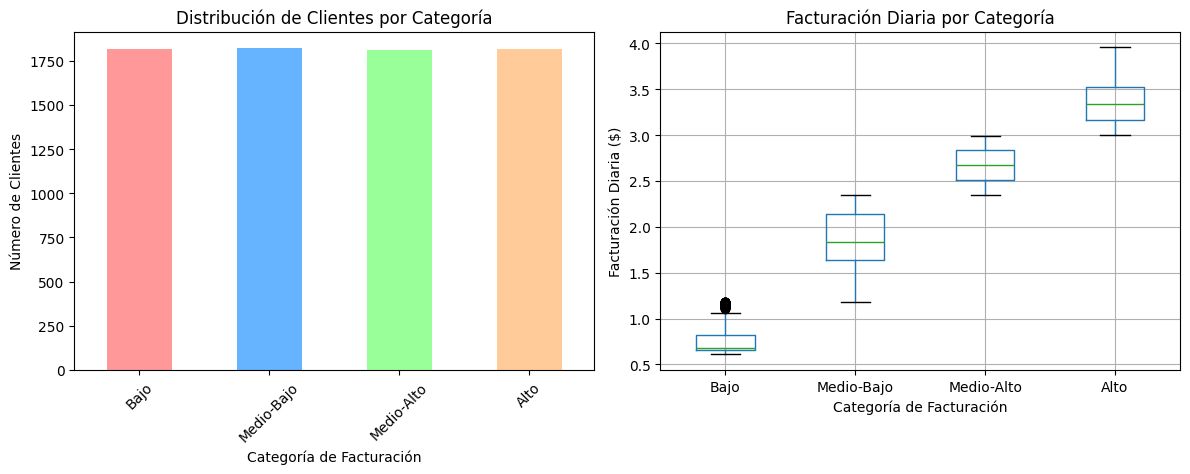



5. ANÁLISIS CRUZADO DE CUENTAS_DIARIAS
----------------------------------------

Facturación diaria promedio por estado de Churn:
           mean    median       std  count
Churn                                     
       2.113743  2.303333  1.046290    224
no     2.042171  2.147500  1.036422   5174
yes    2.481378  2.655000  0.822202   1869


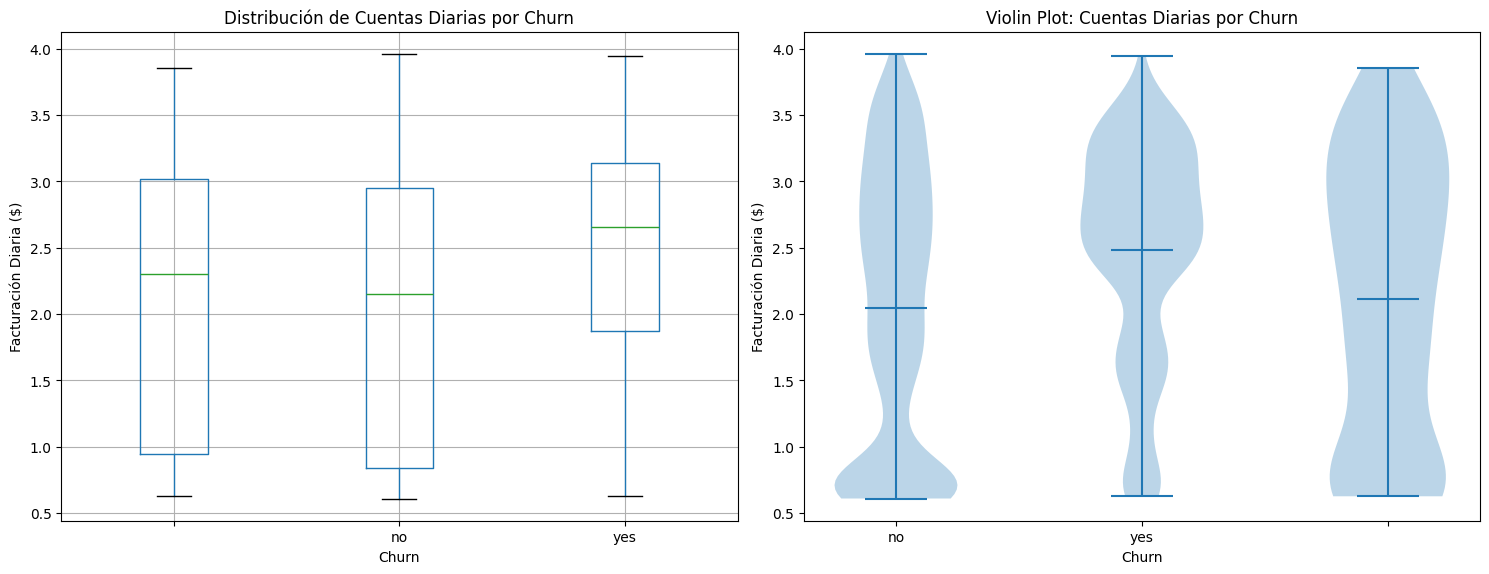



Análisis de Cuentas_Diarias por otras variables categóricas:

📊 customer_gender:
                     mean  count
customer_gender                 
female           2.171445   3592
male             2.143547   3675

📊 customer_Partner:
                      mean  count
customer_Partner                 
yes               2.258023   3518
no                2.062855   3749

📊 customer_Dependents:
                         mean  count
customer_Dependents                 
no                   2.233511   5086
yes                  1.979700   2181


6. GUARDANDO DATASET ACTUALIZADO
----------------------------------------
✅ Dataset actualizado guardado como 'telecomx_data_with_daily.csv'

RESUMEN: NUEVA VARIABLE CREADA
✅ Columna 'Cuentas_Diarias' agregada exitosamente
✅ Columna 'Categoria_Facturacion' creada para segmentación
✅ Total de registros procesados: 7267
✅ Rango de valores: $0.61 - $3.96

💡 TIP: Usa 'df_telecom_analysis' para continuar con el análisis


In [6]:
# 4. SEGMENTACIÓN POR CUENTAS_DIARIAS
print("\n\n4. SEGMENTACIÓN DE CLIENTES POR FACTURACIÓN DIARIA")
print("-" * 40)

# Crear categorías de facturación diaria
# Opción 1: Usar quartiles (0, 0.25, 0.5, 0.75, 1.0)
percentiles = [0, 0.25, 0.5, 0.75, 1.0]
labels = ['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']

# Alternativa: convertir lista a numpy array
# percentiles = np.array([0, 25, 50, 75, 100]) / 100

try:
    df_analysis['Categoria_Facturacion'] = pd.qcut(
        df_analysis['Cuentas_Diarias'],
        q=percentiles,  # Ya están en formato decimal (0-1)
        labels=labels,
        duplicates='drop'
    )

    print("\nDistribución por categorías de facturación:")
    categoria_dist = df_analysis['Categoria_Facturacion'].value_counts().sort_index()
    for categoria, count in categoria_dist.items():
        percentage = (count / len(df_analysis)) * 100
        print(f"   {categoria}: {count} clientes ({percentage:.1f}%)")

    # Rangos de cada categoría
    print("\nRangos de facturación diaria por categoría:")
    for categoria in labels:
        if categoria in df_analysis['Categoria_Facturacion'].unique():
            mask = df_analysis['Categoria_Facturacion'] == categoria
            min_val = df_analysis.loc[mask, 'Cuentas_Diarias'].min()
            max_val = df_analysis.loc[mask, 'Cuentas_Diarias'].max()
            mean_val = df_analysis.loc[mask, 'Cuentas_Diarias'].mean()
            print(f"   {categoria}: ${min_val:.2f} - ${max_val:.2f} (promedio: ${mean_val:.2f})")

    # Visualización de la segmentación
    plt.figure(figsize=(12, 5))

    # Subplot 1: Distribución por categorías
    plt.subplot(1, 2, 1)
    categoria_dist.plot(kind='bar', color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
    plt.title('Distribución de Clientes por Categoría')
    plt.xlabel('Categoría de Facturación')
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45)

    # Subplot 2: Boxplot por categorías
    plt.subplot(1, 2, 2)
    df_analysis.boxplot(column='Cuentas_Diarias', by='Categoria_Facturacion', ax=plt.gca())
    plt.suptitle('')
    plt.title('Facturación Diaria por Categoría')
    plt.xlabel('Categoría de Facturación')
    plt.ylabel('Facturación Diaria ($)')

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"⚠️ Error en la segmentación: {e}")
    print("Intentando método alternativo...")

    # Método alternativo: usar percentiles específicos
    q25 = df_analysis['Cuentas_Diarias'].quantile(0.25)
    q50 = df_analysis['Cuentas_Diarias'].quantile(0.50)
    q75 = df_analysis['Cuentas_Diarias'].quantile(0.75)

    df_analysis['Categoria_Facturacion'] = pd.cut(
        df_analysis['Cuentas_Diarias'],
        bins=[-np.inf, q25, q50, q75, np.inf],
        labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']
    )

    print("✅ Segmentación realizada con método alternativo")

# 5. ANÁLISIS DE CUENTAS_DIARIAS POR OTRAS VARIABLES
print("\n\n5. ANÁLISIS CRUZADO DE CUENTAS_DIARIAS")
print("-" * 40)

# Si existe variable de churn/evasión
target_columns = [col for col in df_analysis.columns if 'churn' in col.lower() or 'evasi' in col.lower()]

if target_columns:
    target_col = target_columns[0]
    print(f"\nFacturación diaria promedio por estado de {target_col}:")

    churn_analysis = df_analysis.groupby(target_col)['Cuentas_Diarias'].agg(['mean', 'median', 'std', 'count'])
    print(churn_analysis)

    # Visualización mejorada
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot
    df_analysis.boxplot(column='Cuentas_Diarias', by=target_col, ax=axes[0])
    axes[0].set_title(f'Distribución de Cuentas Diarias por {target_col}')
    axes[0].set_ylabel('Facturación Diaria ($)')

    # Violin plot para más detalle
    unique_values = df_analysis[target_col].unique()
    data_by_group = [df_analysis[df_analysis[target_col] == val]['Cuentas_Diarias'].dropna()
                     for val in unique_values]

    axes[1].violinplot(data_by_group, positions=range(len(unique_values)), showmeans=True)
    axes[1].set_xticks(range(len(unique_values)))
    axes[1].set_xticklabels(unique_values)
    axes[1].set_xlabel(target_col)
    axes[1].set_ylabel('Facturación Diaria ($)')
    axes[1].set_title(f'Violin Plot: Cuentas Diarias por {target_col}')

    plt.suptitle('')
    plt.tight_layout()
    plt.show()

    # Test estadístico
    if len(unique_values) == 2:
        from scipy import stats
        group1 = df_analysis[df_analysis[target_col] == unique_values[0]]['Cuentas_Diarias'].dropna()
        group2 = df_analysis[df_analysis[target_col] == unique_values[1]]['Cuentas_Diarias'].dropna()

        # Test t de Student
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f"\n📊 Test t de Student:")
        print(f"   - Estadístico t: {t_stat:.4f}")
        print(f"   - Valor p: {p_value:.4f}")
        if p_value < 0.05:
            print("   - ✅ Diferencia estadísticamente significativa (p < 0.05)")
        else:
            print("   - ❌ No hay diferencia estadísticamente significativa (p >= 0.05)")

# Análisis adicional por otras variables categóricas
print("\n\nAnálisis de Cuentas_Diarias por otras variables categóricas:")
categorical_cols = df_analysis.select_dtypes(include=['object']).columns
interesting_cols = [col for col in categorical_cols if col not in [target_col, 'Categoria_Facturacion'] and df_analysis[col].nunique() < 10]

for col in interesting_cols[:3]:  # Analizar máximo 3 columnas
    print(f"\n📊 {col}:")
    summary = df_analysis.groupby(col)['Cuentas_Diarias'].agg(['mean', 'count']).sort_values('mean', ascending=False)
    print(summary)

# 6. GUARDAR DATASET ACTUALIZADO
print("\n\n6. GUARDANDO DATASET ACTUALIZADO")
print("-" * 40)

# Guardar con la nueva columna
df_analysis.to_csv('telecomx_data_with_daily.csv', index=False)
print("✅ Dataset actualizado guardado como 'telecomx_data_with_daily.csv'")

# Resumen final
print("\n" + "=" * 80)
print("RESUMEN: NUEVA VARIABLE CREADA")
print("=" * 80)
print(f"✅ Columna 'Cuentas_Diarias' agregada exitosamente")
print(f"✅ Columna 'Categoria_Facturacion' creada para segmentación")
print(f"✅ Total de registros procesados: {len(df_analysis)}")
print(f"✅ Rango de valores: ${df_analysis['Cuentas_Diarias'].min():.2f} - ${df_analysis['Cuentas_Diarias'].max():.2f}")

# Actualizar variable global
df_telecom_analysis = df_analysis.copy()
print("\n💡 TIP: Usa 'df_telecom_analysis' para continuar con el análisis")

#📊 Carga y análisis

ANÁLISIS DESCRIPTIVO COMPLETO - TELECOM X

Dataset: 7267 filas × 23 columnas


1. ESTADÍSTICAS DESCRIPTIVAS GENERALES

📊 Columnas numéricas: 4
📊 Columnas categóricas: 18


1.1 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
--------------------------------------------------------------------------------
       customer_SeniorCitizen  customer_tenure  account_Charges.Monthly  \
count                  7267.0          7267.00                  7267.00   
mean                      0.0            32.35                    64.72   
std                       0.0            24.57                    30.13   
min                       0.0             0.00                    18.25   
1%                        0.0             1.00                    19.20   
5%                        0.0             1.00                    19.65   
10%                       0.0             2.00                    20.05   
25%                       0.0             9.00                    35.42   
50%                 

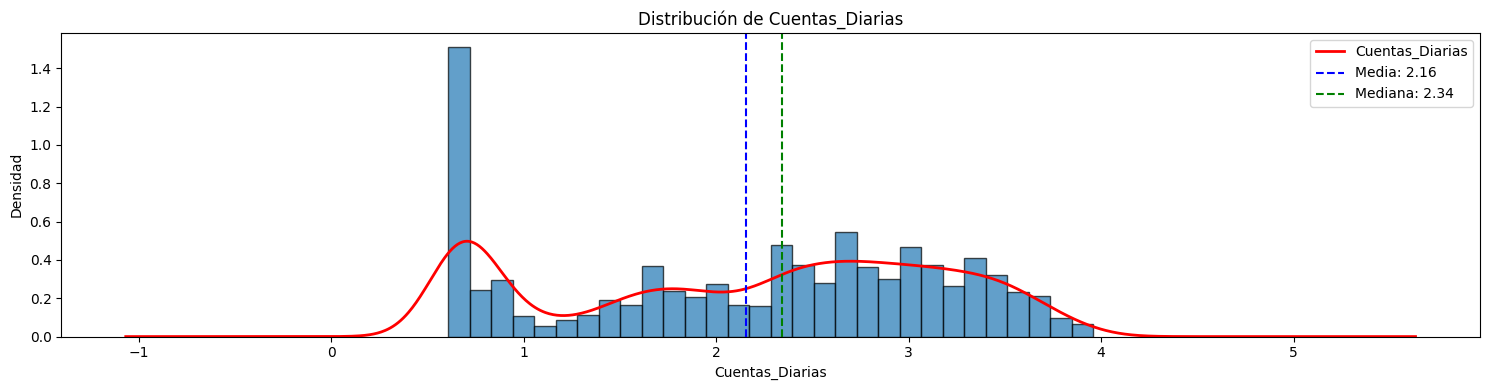



5. ANÁLISIS DE CORRELACIONES

Correlaciones más fuertes (|r| > 0.5):
                Variable 1       Variable 2  Correlación
0  account_Charges.Monthly  Cuentas_Diarias          1.0


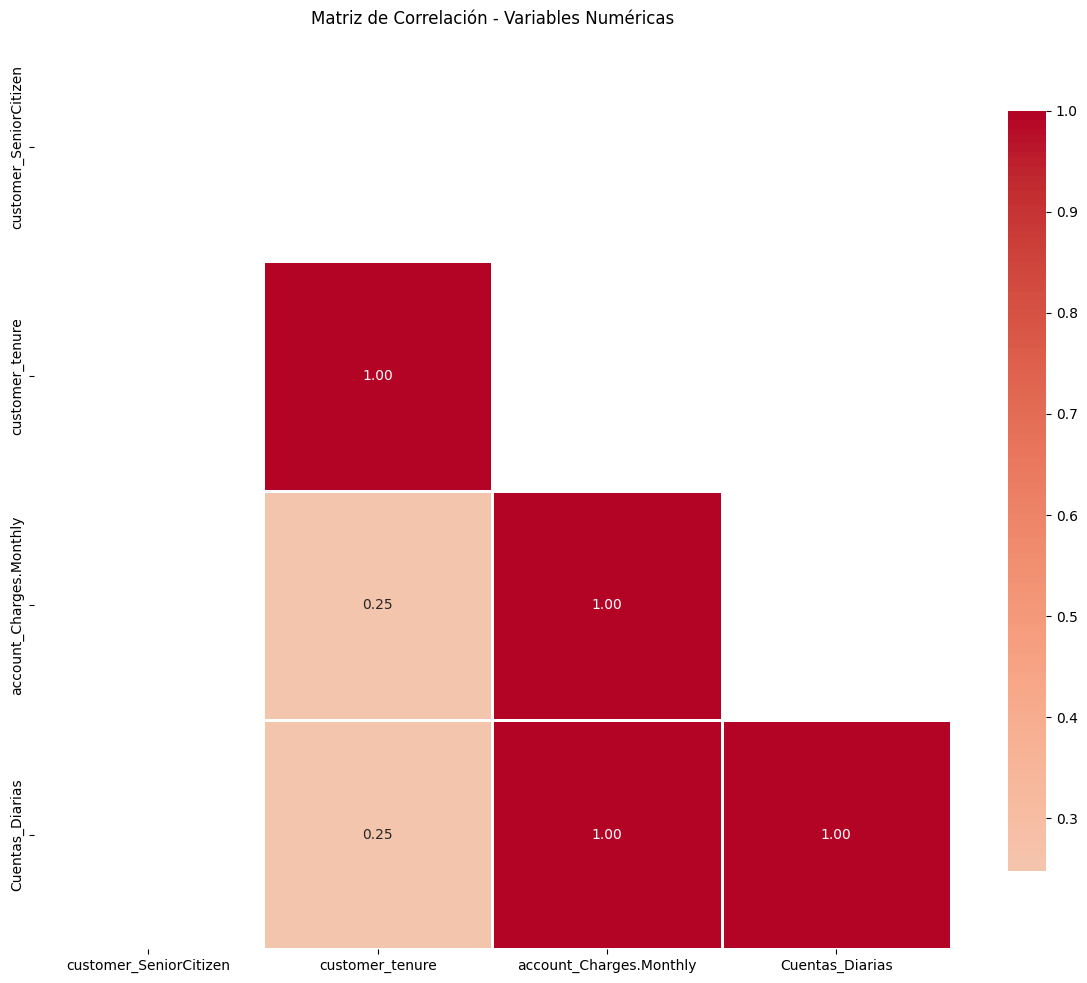



6. ANÁLISIS DE VARIABLE OBJETIVO

✅ Variable objetivo identificada: 'Churn'

Distribución:
   no: 5174 (71.20%)
   yes: 1869 (25.72%)
   : 224 (3.08%)


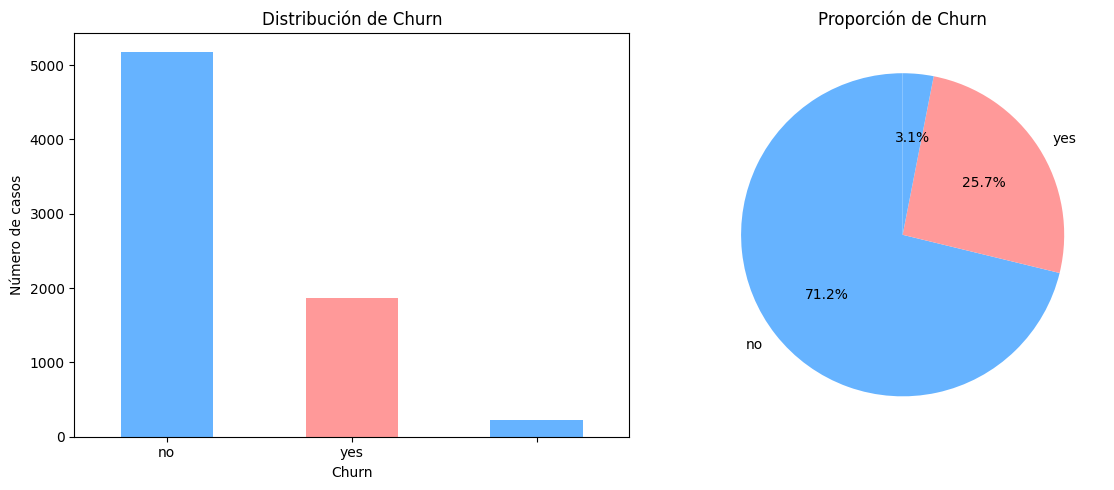



7. RESUMEN EJECUTIVO

Valores únicos en Churn: ['no' 'yes' '']

5. Tasa de evasión/churn: 25.7%
   → Alta tasa de churn - prioridad en retención


📋 RECOMENDACIONES PARA SIGUIENTES PASOS:
----------------------------------------
• Considerar multicolinealidad en variables altamente correlacionadas


9. GUARDANDO RESUMEN DEL ANÁLISIS
----------------------------------------
✅ Guardado: estadisticas_descriptivas_telecomx.csv
✅ Guardado: estadisticas_adicionales_telecomx.csv
✅ Guardado: resumen_analisis_telecomx.json

Contenido del resumen:
{
  "total_registros": 7267,
  "total_variables": 23,
  "variables_numericas": 4,
  "variables_categoricas": 18,
  "valores_nulos_totales": 0,
  "facturacion_diaria_promedio": 2.1573365900646757,
  "facturacion_diaria_mediana": 2.3433333333333333,
  "tasa_churn_porcentaje": 25.7190037154259,
  "facturacion_stats": {
    "min": 0.6083333333333333,
    "max": 3.9583333333333335,
    "std": 1.0043190628555607,
    "q1": 1.1808333333333334,
    "q3": 2.9

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("=" * 80)
print("ANÁLISIS DESCRIPTIVO COMPLETO - TELECOM X")
print("=" * 80)

# Verificar que tenemos el dataset con Cuentas_Diarias
if 'df_telecom_analysis' in locals():
    df = df_telecom_analysis.copy()
elif 'df_analysis' in locals():
    df = df_analysis.copy()
else:
    print("⚠️ Cargando dataset...")
    df = pd.read_csv('telecomx_data_with_daily.csv')

print(f"\nDataset: {df.shape[0]} filas × {df.shape[1]} columnas")

# 1. ANÁLISIS DESCRIPTIVO GENERAL
print("\n\n1. ESTADÍSTICAS DESCRIPTIVAS GENERALES")
print("=" * 80)

# Separar columnas por tipo
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Columnas numéricas: {len(numeric_columns)}")
print(f"📊 Columnas categóricas: {len(categorical_columns)}")

# Estadísticas descriptivas básicas
print("\n\n1.1 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("-" * 80)

# Usar describe() con percentiles adicionales
desc_stats = df[numeric_columns].describe(percentiles=[.01, .05, .10, .25, .50, .75, .90, .95, .99])
print(desc_stats.round(2))

# 2. ANÁLISIS DETALLADO POR VARIABLE NUMÉRICA
print("\n\n2. ANÁLISIS DETALLADO - VARIABLES NUMÉRICAS")
print("=" * 80)

# Crear un DataFrame con estadísticas adicionales
additional_stats = pd.DataFrame(index=numeric_columns)

for col in numeric_columns:
    additional_stats.loc[col, 'Media'] = df[col].mean()
    additional_stats.loc[col, 'Mediana'] = df[col].median()
    additional_stats.loc[col, 'Moda'] = df[col].mode()[0] if len(df[col].mode()) > 0 else np.nan
    additional_stats.loc[col, 'Desv_Estándar'] = df[col].std()
    additional_stats.loc[col, 'Varianza'] = df[col].var()
    additional_stats.loc[col, 'CV%'] = (df[col].std() / df[col].mean() * 100) if df[col].mean() != 0 else np.nan
    additional_stats.loc[col, 'Asimetría'] = df[col].skew()
    additional_stats.loc[col, 'Curtosis'] = df[col].kurtosis()
    additional_stats.loc[col, 'Rango'] = df[col].max() - df[col].min()
    additional_stats.loc[col, 'IQR'] = df[col].quantile(0.75) - df[col].quantile(0.25)
    additional_stats.loc[col, 'Valores_Únicos'] = df[col].nunique()
    additional_stats.loc[col, 'Valores_Nulos'] = df[col].isnull().sum()
    additional_stats.loc[col, 'Outliers_IQR'] = len(df[(df[col] < df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))) |
                                                        (df[col] > df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25)))])

print("\nEstadísticas adicionales:")
print(additional_stats.round(2))

# Interpretación de asimetría y curtosis
print("\n\n2.1 INTERPRETACIÓN DE DISTRIBUCIONES")
print("-" * 40)
for col in numeric_columns[:5]:  # Mostrar solo las primeras 5 para no saturar
    skewness = df[col].skew()
    kurtosis = df[col].kurtosis()

    print(f"\n📊 {col}:")

    # Interpretación de asimetría
    if abs(skewness) < 0.5:
        skew_interpretation = "Simétrica"
    elif skewness > 0:
        skew_interpretation = "Asimétrica positiva (cola hacia la derecha)"
    else:
        skew_interpretation = "Asimétrica negativa (cola hacia la izquierda)"

    # Interpretación de curtosis
    if abs(kurtosis) < 0.5:
        kurt_interpretation = "Mesocúrtica (similar a normal)"
    elif kurtosis > 0:
        kurt_interpretation = "Leptocúrtica (más puntiaguda que normal)"
    else:
        kurt_interpretation = "Platicúrtica (más plana que normal)"

    print(f"   - Asimetría: {skewness:.3f} → {skew_interpretation}")
    print(f"   - Curtosis: {kurtosis:.3f} → {kurt_interpretation}")

# 3. ANÁLISIS DE VARIABLES CATEGÓRICAS
print("\n\n3. ANÁLISIS DESCRIPTIVO - VARIABLES CATEGÓRICAS")
print("=" * 80)

for col in categorical_columns[:10]:  # Limitar a 10 variables
    print(f"\n📊 {col}:")

    # Estadísticas básicas
    unique_values = df[col].nunique()
    most_common = df[col].mode()[0] if len(df[col].mode()) > 0 else 'N/A'
    most_common_freq = df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0
    most_common_pct = (most_common_freq / len(df) * 100)

    print(f"   - Valores únicos: {unique_values}")
    print(f"   - Moda: {most_common} ({most_common_freq} casos, {most_common_pct:.1f}%)")

    # Top 5 categorías
    if unique_values <= 10:
        print("   - Distribución completa:")
        for value, count in df[col].value_counts().items():
            print(f"     • {value}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print("   - Top 5 categorías:")
        for value, count in df[col].value_counts().head(5).items():
            print(f"     • {value}: {count} ({count/len(df)*100:.1f}%)")

# 4. VISUALIZACIONES DE DISTRIBUCIONES
print("\n\n4. VISUALIZACIONES DE DISTRIBUCIONES")
print("=" * 80)

# Seleccionar variables numéricas más importantes
important_numeric = ['Cuentas_Diarias', 'tenure', 'MonthlyCharges', 'TotalCharges']
available_numeric = [col for col in important_numeric if col in numeric_columns]

if len(available_numeric) > 0:
    n_cols = min(len(available_numeric), 4)
    n_rows = (len(available_numeric) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(available_numeric):
        ax = axes[idx]

        # Histograma con KDE
        df[col].hist(bins=30, ax=ax, density=True, alpha=0.7, edgecolor='black')
        df[col].plot(kind='kde', ax=ax, color='red', linewidth=2)

        # Añadir líneas de tendencia central
        mean_val = df[col].mean()
        median_val = df[col].median()
        ax.axvline(mean_val, color='blue', linestyle='--', label=f'Media: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', label=f'Mediana: {median_val:.2f}')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Densidad')
        ax.legend()

    # Ocultar ejes vacíos
    for idx in range(len(available_numeric), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

# 5. MATRIZ DE CORRELACIÓN
print("\n\n5. ANÁLISIS DE CORRELACIONES")
print("=" * 80)

if len(numeric_columns) > 1:
    # Calcular matriz de correlación
    correlation_matrix = df[numeric_columns].corr()

    # Mostrar correlaciones más altas
    print("\nCorrelaciones más fuertes (|r| > 0.5):")

    # Obtener pares de correlaciones
    correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                correlations.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlación': corr_value
                })

    if correlations:
        corr_df = pd.DataFrame(correlations).sort_values('Correlación', key=abs, ascending=False)
        print(corr_df)
    else:
        print("No se encontraron correlaciones fuertes (|r| > 0.5)")

    # Visualización de matriz de correlación
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix), k=1)
    sns.heatmap(correlation_matrix,
                mask=mask,
                annot=True,
                fmt='.2f',
                cmap='coolwarm',
                center=0,
                square=True,
                linewidths=1,
                cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.tight_layout()
    plt.show()

# 6. ANÁLISIS DE VARIABLE OBJETIVO (si existe)
print("\n\n6. ANÁLISIS DE VARIABLE OBJETIVO")
print("=" * 80)

# Buscar variable de churn/evasión
target_columns = [col for col in df.columns if 'churn' in col.lower() or 'evasi' in col.lower()]

if target_columns:
    target_col = target_columns[0]
    print(f"\n✅ Variable objetivo identificada: '{target_col}'")

    # Distribución de la variable objetivo
    print("\nDistribución:")
    value_counts = df[target_col].value_counts()
    for value, count in value_counts.items():
        percentage = count / len(df) * 100
        print(f"   {value}: {count} ({percentage:.2f}%)")

    # Ratio de desbalance
    if len(value_counts) == 2:
        imbalance_ratio = value_counts.max() / value_counts.min()
        print(f"\nRatio de desbalance: {imbalance_ratio:.2f}:1")

        if imbalance_ratio > 3:
            print("⚠️ Dataset desbalanceado - considerar técnicas de balanceo")

    # Visualización
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Gráfico de barras
    value_counts.plot(kind='bar', ax=axes[0], color=['#66b3ff', '#ff9999'])
    axes[0].set_title(f'Distribución de {target_col}')
    axes[0].set_xlabel(target_col)
    axes[0].set_ylabel('Número de casos')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

    # Gráfico de pastel
    value_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                      colors=['#66b3ff', '#ff9999'], startangle=90)
    axes[1].set_ylabel('')
    axes[1].set_title(f'Proporción de {target_col}')

    plt.tight_layout()
    plt.show()

# 7. RESUMEN EJECUTIVO (continuación - corrección del cálculo de churn_rate)
print("\n\n7. RESUMEN EJECUTIVO")
print("=" * 80)

# Inicializar churn_rate
churn_rate = None

# Insight 5: Variable objetivo (CORREGIDO)
if target_columns:
    target_col = target_columns[0]
    value_counts = df[target_col].value_counts()

    # Verificar cómo están codificados los valores de churn
    print(f"\nValores únicos en {target_col}: {df[target_col].unique()}")

    # Calcular churn_rate de forma más robusta
    if 'yes' in value_counts.index:
        churn_count = value_counts['yes']
    elif 'Yes' in value_counts.index:
        churn_count = value_counts['Yes']
    elif 1 in value_counts.index:
        churn_count = value_counts[1]
    elif '1' in value_counts.index:
        churn_count = value_counts['1']
    else:
        # Si no encontramos los valores esperados, tomar el menor valor como churn
        churn_count = value_counts.min()

    churn_rate = (churn_count / len(df)) * 100

    print(f"\n5. Tasa de evasión/churn: {churn_rate:.1f}%")
    if churn_rate > 20:
        print("   → Alta tasa de churn - prioridad en retención")
    elif churn_rate < 10:
        print("   → Baja tasa de churn - focus en prevención")

# 8. RECOMENDACIONES
print("\n\n📋 RECOMENDACIONES PARA SIGUIENTES PASOS:")
print("-" * 40)

recommendations = []

# Basadas en asimetría
if 'highly_skewed' in locals() and highly_skewed:
    recommendations.append("• Aplicar transformaciones a variables asimétricas antes del modelado")

# Basadas en outliers
if 'outlier_vars' in locals() and outlier_vars:
    recommendations.append("• Investigar outliers: ¿errores o casos especiales?")

# Basadas en correlaciones
if 'correlations' in locals() and correlations:
    recommendations.append("• Considerar multicolinealidad en variables altamente correlacionadas")

# Basadas en balance de clases
if target_columns and 'imbalance_ratio' in locals() and imbalance_ratio > 3:
    recommendations.append("• Aplicar técnicas de balanceo (SMOTE, undersampling, etc.)")

# Basadas en missing values
if additional_stats['Valores_Nulos'].sum() > 0:
    recommendations.append("• Revisar estrategia de imputación para valores faltantes restantes")

for rec in recommendations:
    print(rec)

# 9. GUARDAR RESUMEN (CORREGIDO)
print("\n\n9. GUARDANDO RESUMEN DEL ANÁLISIS")
print("-" * 40)

# Crear diccionario con resumen - convertir numpy types a Python natives
summary_dict = {
    'total_registros': int(len(df)),
    'total_variables': int(len(df.columns)),
    'variables_numericas': int(len(numeric_columns)),
    'variables_categoricas': int(len(categorical_columns)),
    'valores_nulos_totales': int(df.isnull().sum().sum()),
    'facturacion_diaria_promedio': float(df['Cuentas_Diarias'].mean()) if 'Cuentas_Diarias' in df.columns else None,
    'facturacion_diaria_mediana': float(df['Cuentas_Diarias'].median()) if 'Cuentas_Diarias' in df.columns else None,
    'tasa_churn_porcentaje': float(churn_rate) if churn_rate is not None else None
}

# Añadir más información al resumen
if 'Cuentas_Diarias' in df.columns:
    summary_dict['facturacion_stats'] = {
        'min': float(df['Cuentas_Diarias'].min()),
        'max': float(df['Cuentas_Diarias'].max()),
        'std': float(df['Cuentas_Diarias'].std()),
        'q1': float(df['Cuentas_Diarias'].quantile(0.25)),
        'q3': float(df['Cuentas_Diarias'].quantile(0.75))
    }

# Guardar estadísticas descriptivas
try:
    desc_stats.to_csv('estadisticas_descriptivas_telecomx.csv')
    print("✅ Guardado: estadisticas_descriptivas_telecomx.csv")
except Exception as e:
    print(f"⚠️ Error al guardar estadísticas descriptivas: {e}")

try:
    additional_stats.to_csv('estadisticas_adicionales_telecomx.csv')
    print("✅ Guardado: estadisticas_adicionales_telecomx.csv")
except Exception as e:
    print(f"⚠️ Error al guardar estadísticas adicionales: {e}")

# Guardar resumen en JSON
try:
    import json
    with open('resumen_analisis_telecomx.json', 'w') as f:
        json.dump(summary_dict, f, indent=4)
    print("✅ Guardado: resumen_analisis_telecomx.json")

    # Mostrar el contenido del resumen
    print("\nContenido del resumen:")
    print(json.dumps(summary_dict, indent=2))

except Exception as e:
    print(f"⚠️ Error al guardar JSON: {e}")
    # Alternativa: guardar como CSV
    pd.DataFrame([summary_dict]).to_csv('resumen_analisis_telecomx.csv', index=False)
    print("✅ Guardado alternativo: resumen_analisis_telecomx.csv")

print("\n" + "=" * 80)
print("✅ ANÁLISIS DESCRIPTIVO COMPLETADO")
print("=" * 80)
print("\n💡 Próximos pasos sugeridos:")
print("   1. Análisis bivariado profundo")
print("   2. Ingeniería de características")
print("   3. Preparación para modelado predictivo")

# Mostrar estructura final del dataset
print(f"\n📊 Dataset final disponible como 'df' con {df.shape[0]} filas y {df.shape[1]} columnas")

Verificando valores únicos de churn:
Columna objetivo: Churn
Valores únicos: ['no' 'yes' '']
Tipo de datos: object

Valor identificado como Churn: yes
Valor identificado como No Churn: no


PASO 2: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS

Variables categóricas a analizar: 15


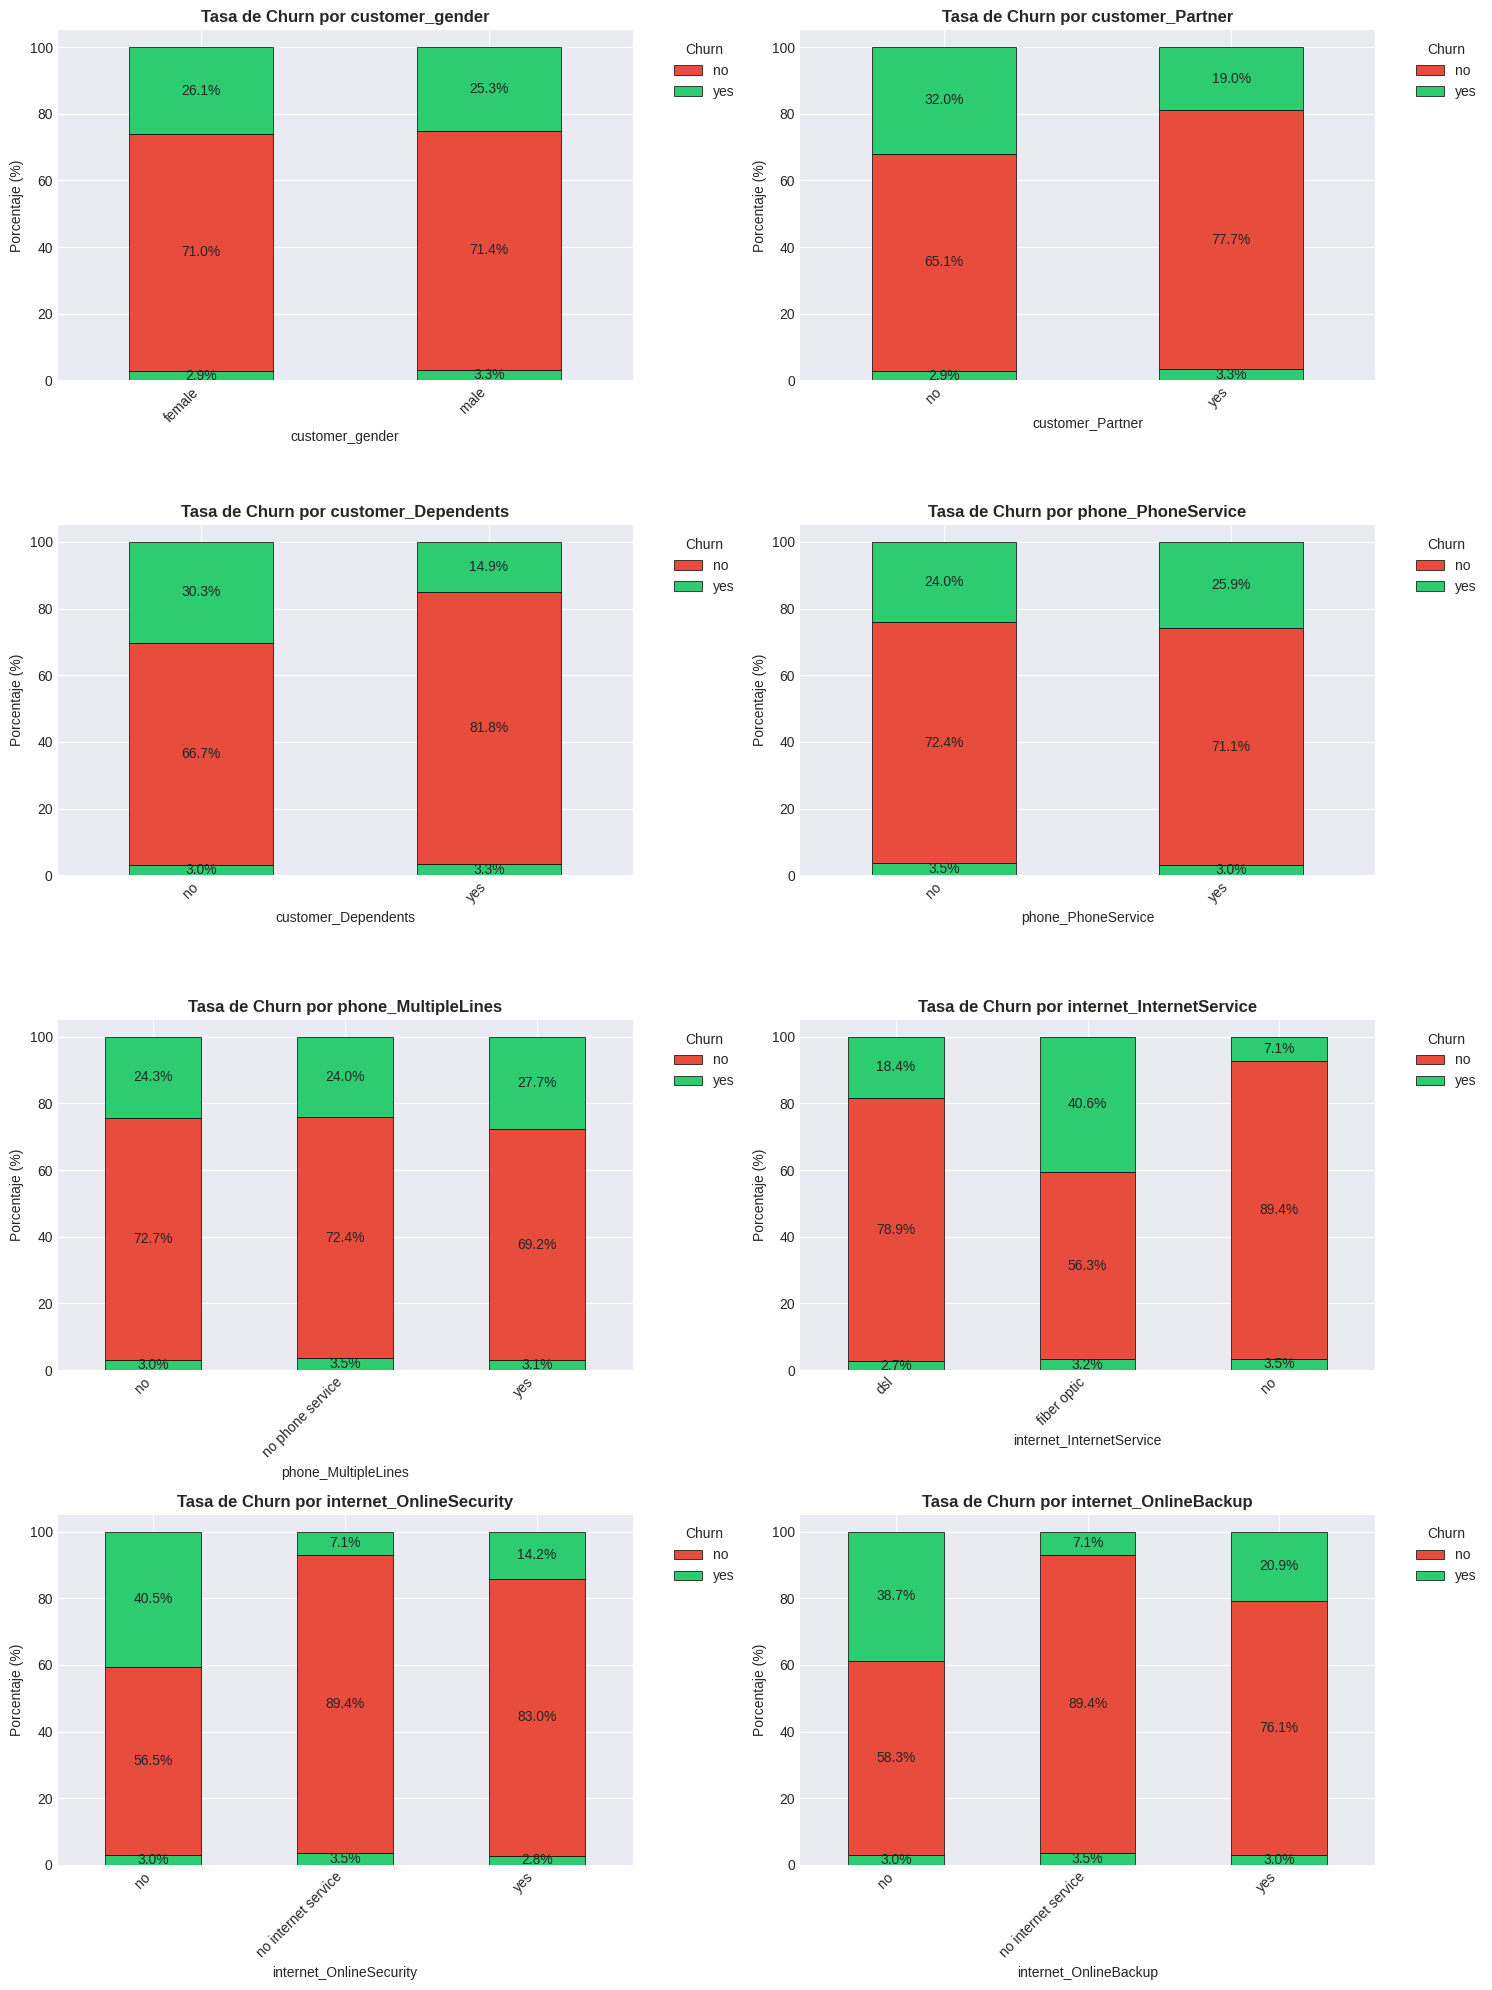


📊 ANÁLISIS ESTADÍSTICO - VARIABLES CATEGÓRICAS
------------------------------------------------------------
                 Variable       Chi2       p-value  Cramér's V  Max Churn %  Min Churn %  Diferencia % Significativo
  internet_OnlineSecurity 850.597625 8.409819e-183    0.241919    40.493348     7.147375     33.345973            Sí
     internet_TechSupport 828.738228 4.573140e-178    0.238790    40.368509     7.147375     33.221134            Sí
 internet_InternetService 733.228377 2.222661e-157    0.224609    40.556598     7.147375     33.409223            Sí
    internet_OnlineBackup 602.115768 5.398990e-129    0.203539    38.749214     7.147375     31.601839            Sí
internet_DeviceProtection 558.859148 1.239087e-119    0.196091    37.902973     7.147375     30.755598            Sí
      customer_Dependents 190.058518  5.361881e-42    0.161721    30.338183    14.947272     15.390911            Sí
         customer_Partner 160.446195  1.443948e-35    0.148589    32.008

In [11]:
# Primero, vamos a verificar cómo están codificados los valores de churn
print("Verificando valores únicos de churn:")
print(f"Columna objetivo: {target_col}")
print(f"Valores únicos: {df[target_col].unique()}")
print(f"Tipo de datos: {df[target_col].dtype}")

# Determinar qué valor representa churn
churn_values = df[target_col].unique()
if 'yes' in [str(v).lower() for v in churn_values]:
    churn_value = [v for v in churn_values if str(v).lower() == 'yes'][0]
    no_churn_value = [v for v in churn_values if str(v).lower() == 'no'][0]
elif 'Yes' in churn_values:
    churn_value = 'Yes'
    no_churn_value = 'No'
elif 1 in churn_values:
    churn_value = 1
    no_churn_value = 0
elif '1' in churn_values:
    churn_value = '1'
    no_churn_value = '0'
else:
    # Asumir que el valor menos frecuente es churn
    value_counts = df[target_col].value_counts()
    churn_value = value_counts.idxmin()
    no_churn_value = value_counts.idxmax()

print(f"\nValor identificado como Churn: {churn_value}")
print(f"Valor identificado como No Churn: {no_churn_value}")

# Ahora, actualizar el código del análisis con los valores correctos
# PASO 2: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS (CORREGIDO)
print("\n\n" + "="*80)
print("PASO 2: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS")
print("="*80)

# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols = [col for col in categorical_cols
                   if col != target_col and df[col].nunique() <= 10]

print(f"\nVariables categóricas a analizar: {len(categorical_cols)}")

# Configurar el estilo
plt.style.use('seaborn-v0_8-darkgrid' if 'seaborn-v0_8-darkgrid' in plt.style.available else 'seaborn-darkgrid')

# Crear visualizaciones para cada variable categórica
n_vars = len(categorical_cols[:8])
n_cols = 2
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

for idx, col in enumerate(categorical_cols[:8]):
    ax = axes[idx]

    # Crear tabla de contingencia
    ct = pd.crosstab(df[col], df[target_col], normalize='index') * 100

    # Crear gráfico de barras apiladas
    ct.plot(kind='bar', stacked=True, ax=ax,
            color=['#2ecc71', '#e74c3c'],
            edgecolor='black', linewidth=0.5)

    ax.set_title(f'Tasa de Churn por {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Porcentaje (%)')
    ax.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Añadir valores en las barras
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='center')

# Ocultar ejes vacíos
for idx in range(len(categorical_cols[:8]), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

# Análisis estadístico para variables categóricas (CORREGIDO)
print("\n📊 ANÁLISIS ESTADÍSTICO - VARIABLES CATEGÓRICAS")
print("-" * 60)

categorical_analysis = []

for col in categorical_cols[:10]:
    # Tabla de contingencia
    ct = pd.crosstab(df[col], df[target_col])

    # Test Chi-cuadrado
    chi2, p_value, dof, expected = stats.chi2_contingency(ct)

    # Calcular Cramér's V
    n = ct.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

    # Tasa de churn por categoría
    churn_rates = pd.crosstab(df[col], df[target_col], normalize='index')
    if churn_value in churn_rates.columns:
        churn_col_rates = churn_rates[churn_value] * 100
        max_churn = churn_col_rates.max()
        min_churn = churn_col_rates.min()
        diff_churn = max_churn - min_churn
    else:
        max_churn = min_churn = diff_churn = 0

    categorical_analysis.append({
        'Variable': col,
        'Chi2': chi2,
        'p-value': p_value,
        "Cramér's V": cramers_v,
        'Max Churn %': max_churn,
        'Min Churn %': min_churn,
        'Diferencia %': diff_churn,
        'Significativo': 'Sí' if p_value < 0.05 else 'No'
    })

cat_analysis_df = pd.DataFrame(categorical_analysis)
cat_analysis_df = cat_analysis_df.sort_values("Cramér's V", ascending=False)
print(cat_analysis_df.to_string(index=False))

# PASO 3: ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS (CORREGIDO)
print("\n\n" + "="*80)
print("PASO 3: ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS")
print("="*80)

# Identificar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col != target_col]

print(f"\nVariables numéricas a analizar: {len(numeric_cols)}")

# Análisis estadístico para variables numéricas (CORREGIDO)
numeric_analysis = []

for col in numeric_cols[:10]:
    # Separar grupos
    group_no_churn = df[df[target_col] == no_churn_value][col].dropna()
    group_churn = df[df[target_col] == churn_value][col].dropna()

    if len(group_no_churn) > 0 and len(group_churn) > 0:
        # Test t de Student
        statistic, p_value = stats.ttest_ind(group_no_churn, group_churn)
        test_name = 'T-test'

        # Calcular tamaño del efecto (Cohen's d)
        mean_diff = group_no_churn.mean() - group_churn.mean()
        pooled_std = np.sqrt((group_no_churn.var() + group_churn.var()) / 2)
        cohens_d = mean_diff / pooled_std if pooled_std > 0 else 0

        numeric_analysis.append({
            'Variable': col,
            'Test': test_name,
            'Estadístico': statistic,
            'p-value': p_value,
            "Cohen's d": cohens_d,
            'Media No Churn': group_no_churn.mean(),
            'Media Churn': group_churn.mean(),
            'Diferencia': group_churn.mean() - group_no_churn.mean(),
            'Significativo': 'Sí' if p_value < 0.05 else 'No'
        })

num_analysis_df = pd.DataFrame(numeric_analysis)
num_analysis_df = num_analysis_df.sort_values('p-value')
print(num_analysis_df.to_string(index=False))

# Continuar con el resto del código usando churn_value y no_churn_value en lugar de 1 y 0...

ANÁLISIS BIVARIADO: CHURN VS OTRAS VARIABLES
✅ Variable objetivo: Churn


PASO 2: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS

Variables categóricas a analizar: 15


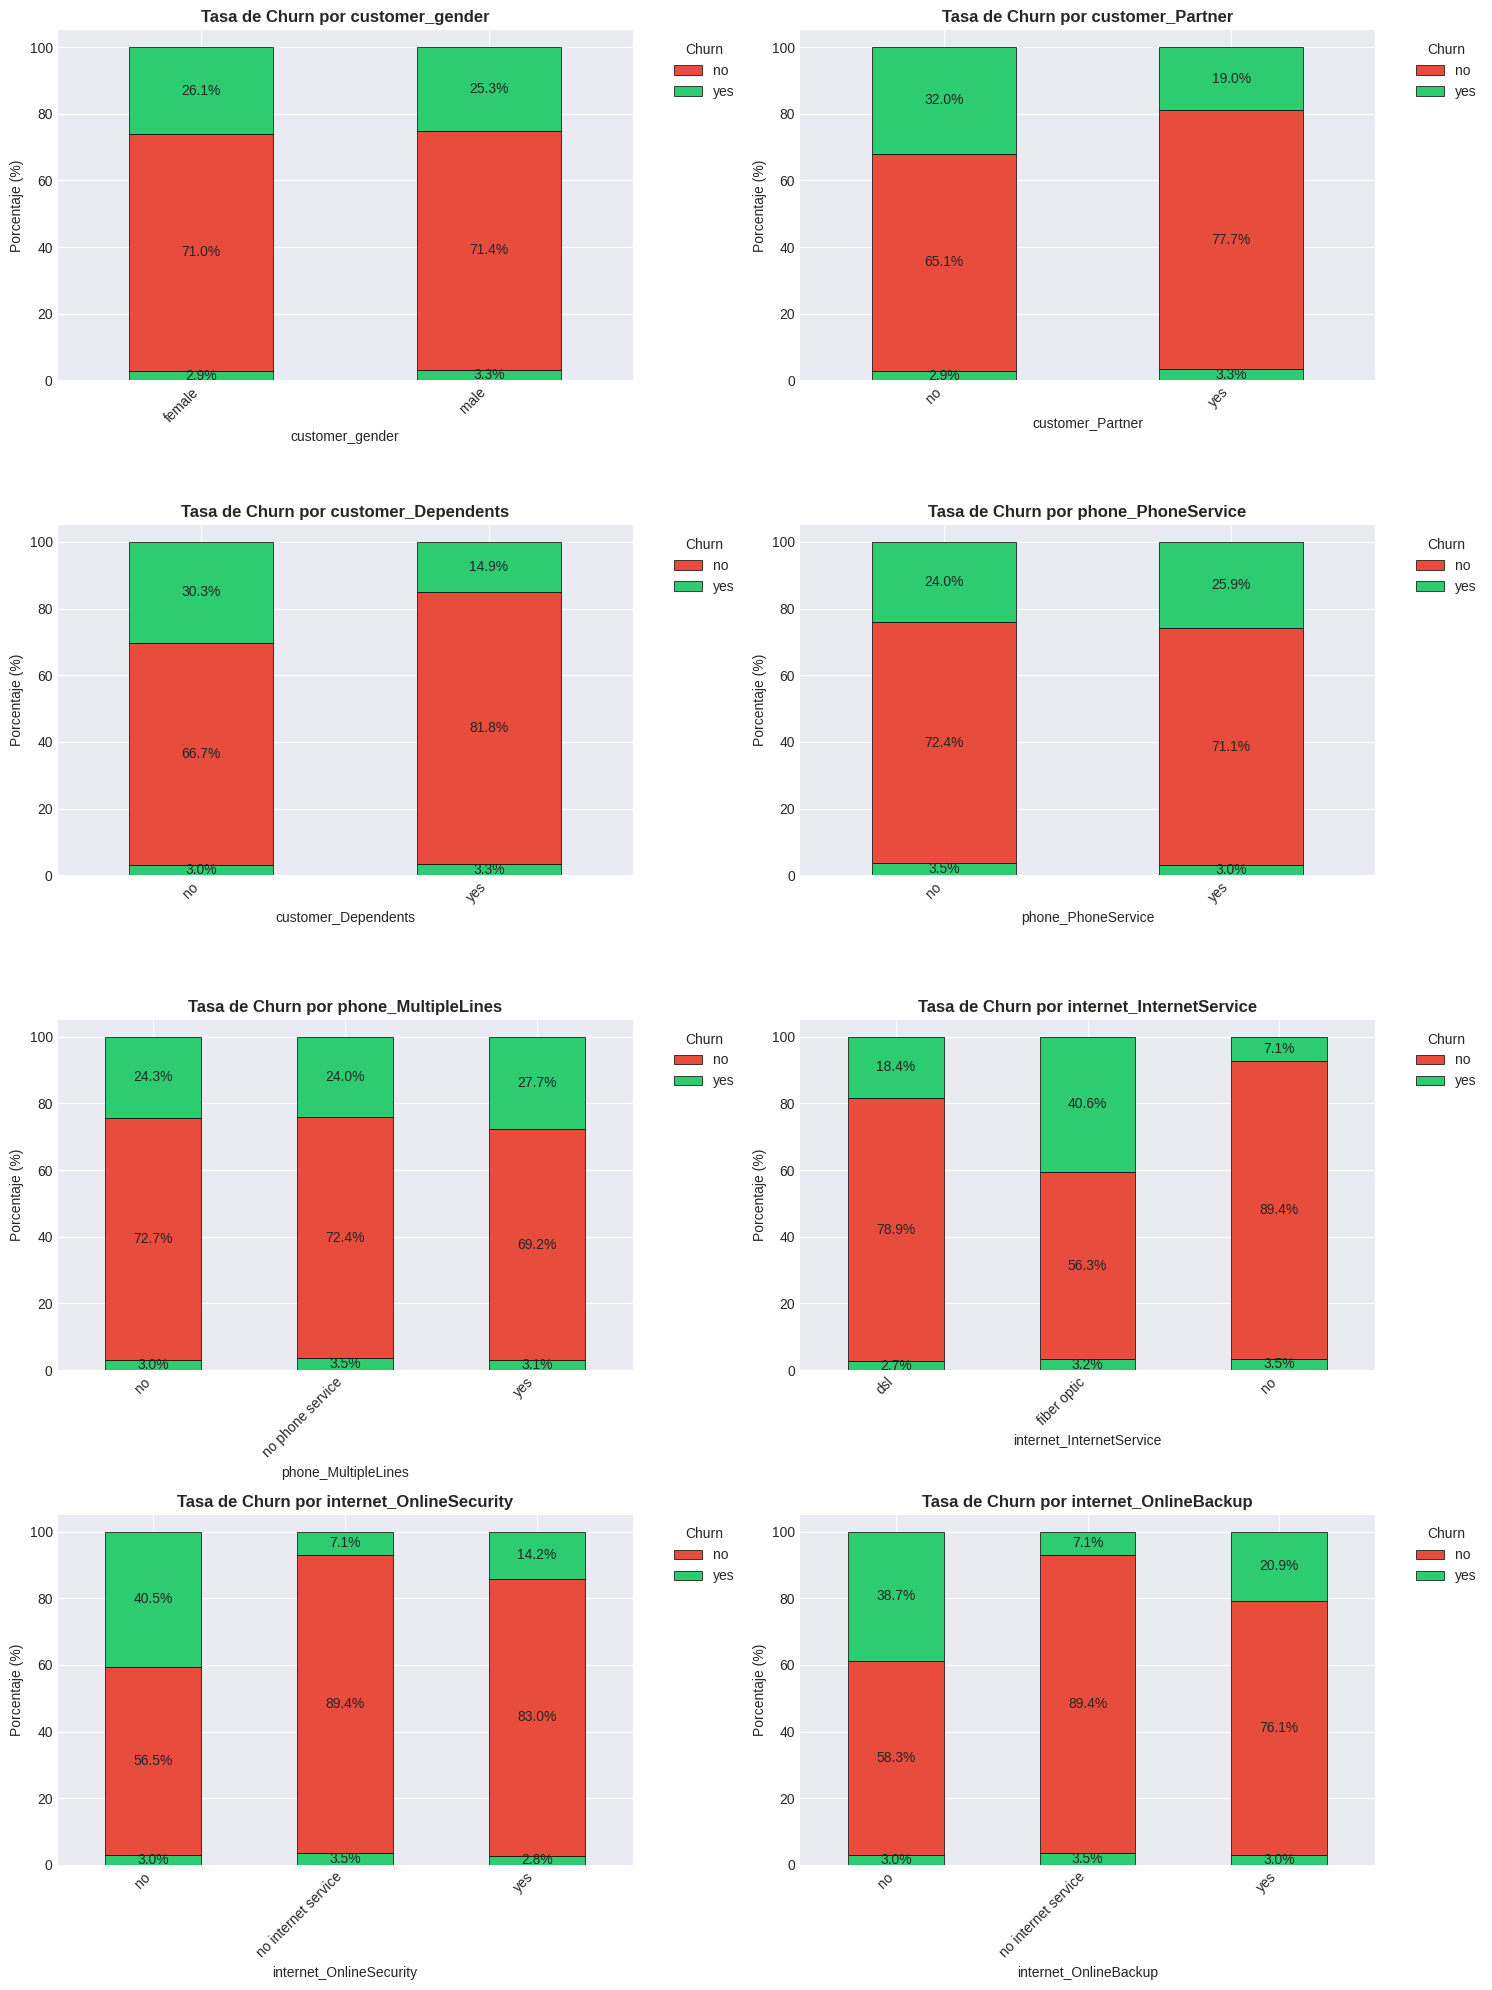



PASO 3: ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS

Variables numéricas a analizar: 4


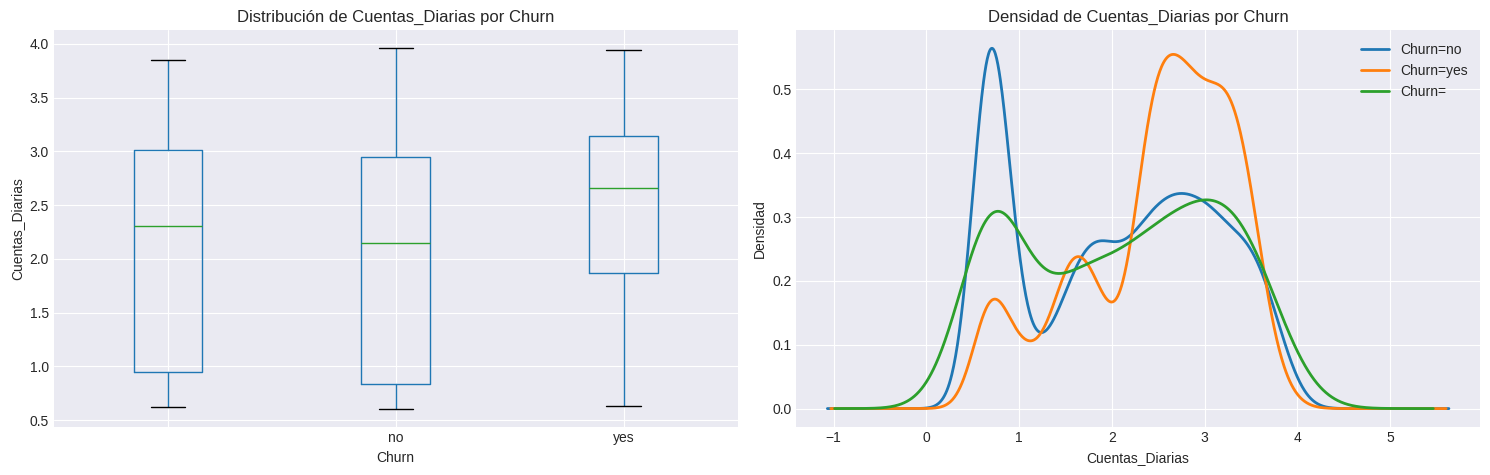


📊 ANÁLISIS ESTADÍSTICO - VARIABLES NUMÉRICAS
------------------------------------------------------------
               Variable  Test  Estadístico       p-value  Cohen's d  Media No Churn  Media Churn  Diferencia Significativo
        customer_tenure ANOVA   495.984219 1.227924e-202        NaN             NaN          NaN         NaN            Sí
account_Charges.Monthly ANOVA   136.413001  6.950916e-59        NaN             NaN          NaN         NaN            Sí
        Cuentas_Diarias ANOVA   136.413001  6.950916e-59        NaN             NaN          NaN         NaN            Sí
 customer_SeniorCitizen ANOVA          NaN           NaN        NaN             NaN          NaN         NaN            No


RESUMEN DE HALLAZGOS CLAVE

📊 VARIABLES CATEGÓRICAS MÁS INFLUYENTES EN CHURN:
------------------------------------------------------------

• internet_OnlineSecurity:
  - Cramér's V: 0.242 (asociación moderada)
  - Diferencia en tasa de churn: 33.3%
  - Rango: 7.1% - 40.5%

•

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)




📁 GUARDANDO RESULTADOS DEL ANÁLISIS BIVARIADO
------------------------------------------------------------
✅ Archivos guardados:
   - analisis_churn_categoricas.csv
   - analisis_churn_numericas.csv
   - reporte_analisis_churn.txt


💡 RECOMENDACIONES BASADAS EN EL ANÁLISIS

1. SEGMENTACIÓN DE RIESGO:
   - Crear scores de riesgo basados en las variables más influyentes
   - Priorizar clientes con combinaciones de alto riesgo

2. ESTRATEGIAS DE RETENCIÓN:
   - Foco especial en clientes con internet_OnlineSecurity de alto riesgo
   - Monitorear clientes con customer_tenure en rangos críticos

3. PRÓXIMOS PASOS:
   - Crear modelo predictivo usando las variables identificadas
   - Desarrollar estrategias específicas por segmento
   - Implementar sistema de alertas tempranas

✅ ANÁLISIS BIVARIADO COMPLETADO


<ipython-input-15-950189275d4a>:381: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f.write(f"Tasa general de churn: {(churn_counts[1]/len(df)*100):.2f}%\n\n")


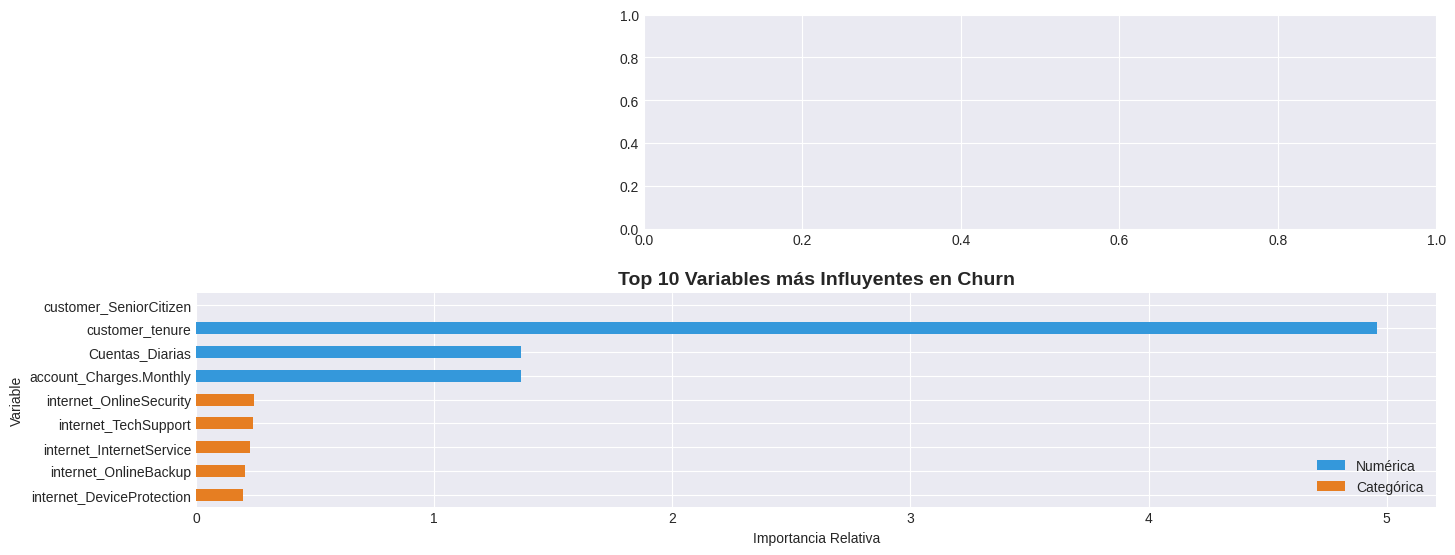

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

print("=" * 80)
print("ANÁLISIS BIVARIADO: CHURN VS OTRAS VARIABLES")
print("=" * 80)

# Verificar que tenemos el dataset
if 'df' not in locals():
    if 'df_telecom_analysis' in locals():
        df = df_telecom_analysis.copy()
    else:
        df = pd.read_csv('telecomx_data_with_daily.csv')

# Identificar variable objetivo
target_columns = [col for col in df.columns if 'churn' in col.lower() or 'evasi' in col.lower()]

if not target_columns:
    print("❌ No se encontró variable de churn/evasión")
else:
    target_col = target_columns[0]
    print(f"✅ Variable objetivo: {target_col}")

    # PASO 2: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS
    print("\n\n" + "="*80)
    print("PASO 2: ANÁLISIS DE CHURN POR VARIABLES CATEGÓRICAS")
    print("="*80)

    # Identificar variables categóricas
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    # Excluir la variable objetivo y variables con muchas categorías
    categorical_cols = [col for col in categorical_cols
                       if col != target_col and df[col].nunique() <= 10]

    print(f"\nVariables categóricas a analizar: {len(categorical_cols)}")

    # Configurar el estilo
    plt.style.use('seaborn-v0_8-darkgrid')

    # Crear visualizaciones para cada variable categórica
    n_vars = len(categorical_cols[:8])  # Limitar a 8 variables
    n_cols = 2
    n_rows = (n_vars + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(categorical_cols[:8]):
        ax = axes[idx]

        # Crear tabla de contingencia
        ct = pd.crosstab(df[col], df[target_col], normalize='index') * 100

        # Crear gráfico de barras apiladas
        ct.plot(kind='bar', stacked=True, ax=ax,
                color=['#2ecc71', '#e74c3c'],
                edgecolor='black', linewidth=0.5)

        ax.set_title(f'Tasa de Churn por {col}', fontsize=12, fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Porcentaje (%)')
        ax.legend(title=target_col, bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Añadir valores en las barras
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f%%', label_type='center')

    # Ocultar ejes vacíos
    for idx in range(len(categorical_cols[:8]), len(axes)):
        axes[idx].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Análisis estadístico para variables categóricas
    # print("\n📊 ANÁLISIS ESTADÍSTICO - VARIABLES CATEGÓRICAS")
    # print("-" * 60)

    # categorical_analysis = []

    # for col in categorical_cols[:10]:
    #     # Tabla de contingencia
    #     ct = pd.crosstab(df[col], df[target_col])

    #     # Test Chi-cuadrado
    #     chi2, p_value, dof, expected = stats.chi2_contingency(ct)

    #     # Calcular Cramér's V
    #     n = ct.sum().sum()
    #     cramers_v = np.sqrt(chi2 / (n * (min(ct.shape) - 1)))

    #     # Tasa de churn por categoría
    #     churn_rates = pd.crosstab(df[col], df[target_col], normalize='index')[1] * 100
    #     max_churn = churn_rates.max()
    #     min_churn = churn_rates.min()
    #     diff_churn = max_churn - min_churn

    #     categorical_analysis.append({
    #         'Variable': col,
    #         'Chi2': chi2,
    #         'p-value': p_value,
    #         'Cramér\'s V': cramers_v,
    #         'Max Churn %': max_churn,
    #         'Min Churn %': min_churn,
    #         'Diferencia %': diff_churn,
    #         'Significativo': 'Sí' if p_value < 0.05 else 'No'
    #     })

    # cat_analysis_df = pd.DataFrame(categorical_analysis)
    # cat_analysis_df = cat_analysis_df.sort_values('Cramér\'s V', ascending=False)
    # print(cat_analysis_df.to_string(index=False))

    # PASO 3: ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS
    print("\n\n" + "="*80)
    print("PASO 3: ANÁLISIS DE CHURN POR VARIABLES NUMÉRICAS")
    print("="*80)

    # Identificar variables numéricas
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    # Excluir la variable objetivo si es numérica
    numeric_cols = [col for col in numeric_cols if col != target_col]

    print(f"\nVariables numéricas a analizar: {len(numeric_cols)}")

    # Crear visualizaciones para variables numéricas importantes
    important_numeric = ['Cuentas_Diarias', 'tenure', 'MonthlyCharges', 'TotalCharges']
    available_numeric = [col for col in important_numeric if col in numeric_cols]

    # Si no encontramos las variables importantes, usar las primeras disponibles
    if not available_numeric:
        available_numeric = numeric_cols[:4]

    n_vars = len(available_numeric)
    fig, axes = plt.subplots(n_vars, 2, figsize=(15, 5*n_vars))

    if n_vars == 1:
        axes = axes.reshape(1, -1)

    for idx, col in enumerate(available_numeric):
        # Boxplot
        ax1 = axes[idx, 0]
        df.boxplot(column=col, by=target_col, ax=ax1)
        ax1.set_title(f'Distribución de {col} por {target_col}')
        ax1.set_xlabel(target_col)
        ax1.set_ylabel(col)

        # Histograma con KDE
        ax2 = axes[idx, 1]
        for value in df[target_col].unique():
            subset = df[df[target_col] == value][col].dropna()
            subset.plot(kind='kde', ax=ax2, label=f'{target_col}={value}', linewidth=2)

        ax2.set_title(f'Densidad de {col} por {target_col}')
        ax2.set_xlabel(col)
        ax2.set_ylabel('Densidad')
        ax2.legend()

    plt.suptitle('')
    plt.tight_layout()
    plt.show()

    # Análisis estadístico para variables numéricas
    print("\n📊 ANÁLISIS ESTADÍSTICO - VARIABLES NUMÉRICAS")
    print("-" * 60)

    numeric_analysis = []

    for col in numeric_cols[:10]:
        # Separar grupos
        groups = []
        group_labels = []

        for value in sorted(df[target_col].unique()):
            group_data = df[df[target_col] == value][col].dropna()
            if len(group_data) > 0:
                groups.append(group_data)
                group_labels.append(value)

        if len(groups) == 2:
            # Test t de Student
            statistic, p_value = stats.ttest_ind(groups[0], groups[1])
            test_name = 'T-test'

            # Calcular tamaño del efecto (Cohen's d)
            mean_diff = groups[0].mean() - groups[1].mean()
            pooled_std = np.sqrt((groups[0].var() + groups[1].var()) / 2)
            cohens_d = mean_diff / pooled_std if pooled_std > 0 else 0

        else:
            # ANOVA para más de 2 grupos
            statistic, p_value = stats.f_oneway(*groups)
            test_name = 'ANOVA'
            cohens_d = np.nan

        # Estadísticas por grupo
        stats_by_group = df.groupby(target_col)[col].agg(['mean', 'median', 'std'])
        mean_no_churn = stats_by_group.loc[0, 'mean'] if 0 in stats_by_group.index else np.nan
        mean_churn = stats_by_group.loc[1, 'mean'] if 1 in stats_by_group.index else np.nan

        numeric_analysis.append({
            'Variable': col,
            'Test': test_name,
            'Estadístico': statistic,
            'p-value': p_value,
            'Cohen\'s d': cohens_d,
            'Media No Churn': mean_no_churn,
            'Media Churn': mean_churn,
            'Diferencia': mean_churn - mean_no_churn,
            'Significativo': 'Sí' if p_value < 0.05 else 'No'
        })

    num_analysis_df = pd.DataFrame(numeric_analysis)
    num_analysis_df = num_analysis_df.sort_values('p-value')
    print(num_analysis_df.to_string(index=False))

        # RESUMEN DE HALLAZGOS
    print("\n\n" + "="*80)
    print("RESUMEN DE HALLAZGOS CLAVE")
    print("="*80)

    # Variables categóricas más importantes
    print("\n📊 VARIABLES CATEGÓRICAS MÁS INFLUYENTES EN CHURN:")
    print("-" * 60)

    top_categorical = cat_analysis_df[cat_analysis_df['Significativo'] == 'Sí'].head(3)
    for idx, row in top_categorical.iterrows():
        print(f"\n• {row['Variable']}:")
        cramers_v = row["Cramér's V"]  # Extraer el valor fuera del f-string
        asociacion = 'fuerte' if cramers_v > 0.3 else 'moderada' if cramers_v > 0.2 else 'débil'
        print(f"  - Cramér's V: {cramers_v:.3f} (asociación {asociacion})")
        print(f"  - Diferencia en tasa de churn: {row['Diferencia %']:.1f}%")
        print(f"  - Rango: {row['Min Churn %']:.1f}% - {row['Max Churn %']:.1f}%")

    # Variables numéricas más importantes
    print("\n\n📊 VARIABLES NUMÉRICAS MÁS INFLUYENTES EN CHURN:")
    print("-" * 60)

    top_numeric = num_analysis_df[num_analysis_df['Significativo'] == 'Sí'].head(3)
    for idx, row in top_numeric.iterrows():
        print(f"\n• {row['Variable']}:")
        print(f"  - p-value: {row['p-value']:.4f}")
        cohens_d = row["Cohen's d"]  # Extraer el valor fuera del f-string
        if not np.isnan(cohens_d):
            effect_size = 'grande' if abs(cohens_d) > 0.8 else 'mediano' if abs(cohens_d) > 0.5 else 'pequeño'
            print(f"  - Tamaño del efecto (Cohen's d): {cohens_d:.3f} ({effect_size})")
        print(f"  - Media No Churn: {row['Media No Churn']:.2f}")
        print(f"  - Media Churn: {row['Media Churn']:.2f}")
        print(f"  - Diferencia: {row['Diferencia']:.2f}")

    # VISUALIZACIÓN RESUMEN: TOP VARIABLES
    print("\n\nGenerando visualización resumen...")

    # Crear dashboard de resumen
    fig = plt.figure(figsize=(16, 10))

    # Definir grid
    gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

    # 1. Tasa de churn general (arriba izquierda)
    # ax1 = fig.add_subplot(gs[0, 0])
    # churn_counts = df[target_col].value_counts()
    # colors = ['#2ecc71', '#e74c3c']
    # wedges, texts, autotexts = ax1.pie(churn_counts.values,
    #                                     labels=['No Churn', 'Churn'],
    #                                     autopct='%1.1f%%',
    #                                     colors=colors,
    #                                     explode=(0, 0.1),
    #                                     shadow=True,
    #                                     startangle=90)
    # ax1.set_title('Distribución General de Churn', fontsize=14, fontweight='bold')

    # 2. Top 3 variables categóricas (arriba centro y derecha)
    if len(top_categorical) > 0:
        ax2 = fig.add_subplot(gs[0, 1:])

        # Preparar datos para heatmap
        heatmap_data = []
        for idx, row in top_categorical.iterrows():
            var_name = row['Variable']
            ct = pd.crosstab(df[var_name], df[target_col], normalize='index') * 100
            if 1 in ct.columns:
                heatmap_data.append(ct[1].values)

        if heatmap_data:
            heatmap_df = pd.DataFrame(heatmap_data,
                                     index=top_categorical['Variable'].values,
                                     columns=ct.index)

            sns.heatmap(heatmap_df, annot=True, fmt='.1f', cmap='RdYlBu_r',
                       center=churn_counts[1]/len(df)*100, ax=ax2,
                       cbar_kws={'label': 'Tasa de Churn (%)'})
            ax2.set_title('Tasa de Churn por Variables Categóricas Top', fontsize=14, fontweight='bold')
            ax2.set_xlabel('')

    # 3. Importancia de variables (medio)
    ax3 = fig.add_subplot(gs[1, :])

    # Combinar importancia de variables categóricas y numéricas
    importance_data = []

    # Añadir categóricas
    for idx, row in cat_analysis_df.head(5).iterrows():
        importance_data.append({
            'Variable': row['Variable'],
            'Importancia': row["Cramér's V"],  # Corregido aquí también
            'Tipo': 'Categórica'
        })

    # Añadir numéricas (usar valor absoluto de Cohen's d o estadístico normalizado)
    for idx, row in num_analysis_df.head(5).iterrows():
        cohens_d_val = row["Cohen's d"]  # Corregido aquí también
        if not np.isnan(cohens_d_val):
            importance = abs(cohens_d_val)
        else:
            importance = abs(row['Estadístico']) / 100  # Normalizar

        importance_data.append({
            'Variable': row['Variable'],
            'Importancia': importance,
            'Tipo': 'Numérica'
        })

    importance_df = pd.DataFrame(importance_data).sort_values('Importancia', ascending=True).tail(10)

    colors_bar = ['#3498db' if t == 'Numérica' else '#e67e22' for t in importance_df['Tipo']]
    importance_df.plot(kind='barh', x='Variable', y='Importancia', ax=ax3,
                      color=colors_bar, legend=False)
    ax3.set_title('Top 10 Variables más Influyentes en Churn', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Importancia Relativa')

    # Añadir leyenda
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor='#3498db', label='Numérica'),
                      Patch(facecolor='#e67e22', label='Categórica')]
    ax3.legend(handles=legend_elements, loc='lower right')

    # 4. Distribución de variable numérica más importante (abajo)
    # if len(top_numeric) > 0:
    #     ax4 = fig.add_subplot(gs[2, :])

    #     most_important_numeric = top_numeric.iloc[0]['Variable']

    #     # Violin plot
    #     violin_parts = ax4.violinplot([df[df[target_col] == 0][most_important_numeric].dropna(),
    #                                   df[df[target_col] == 1][most_important_numeric].dropna()],
    #                                  positions=[0, 1], showmeans=True, showextrema=True)

    #     # Personalizar colores
    #     for pc, color in zip(violin_parts['bodies'], colors):
    #         pc.set_facecolor(color)
    #         pc.set_alpha(0.7)

    #     ax4.set_xticks([0, 1])
    #     ax4.set_xticklabels(['No Churn', 'Churn'])
    #     ax4.set_ylabel(most_important_numeric)
    #     ax4.set_title(f'Distribución de {most_important_numeric} por Estado de Churn',
    #                  fontsize=14, fontweight='bold')
    #     ax4.grid(axis='y', alpha=0.3)

    # plt.suptitle('Dashboard de Análisis de Churn - Telecom X', fontsize=16, fontweight='bold')
    # plt.tight_layout()
    # plt.show()

    # GUARDAR RESULTADOS
    print("\n\n📁 GUARDANDO RESULTADOS DEL ANÁLISIS BIVARIADO")
    print("-" * 60)

    # Guardar tablas de análisis
    cat_analysis_df.to_csv('analisis_churn_categoricas.csv', index=False)
    num_analysis_df.to_csv('analisis_churn_numericas.csv', index=False)

    # Crear reporte de texto
    with open('reporte_analisis_churn.txt', 'w', encoding='utf-8') as f:
        f.write("REPORTE DE ANÁLISIS DE CHURN - TELECOM X\n")
        f.write("="*60 + "\n\n")

        f.write(f"Tasa general de churn: {(churn_counts[1]/len(df)*100):.2f}%\n\n")

        f.write("VARIABLES MÁS INFLUYENTES:\n")
        f.write("-"*30 + "\n")

        f.write("\nCategóricas:\n")
        for idx, row in top_categorical.iterrows():
            cramers_v_val = row["Cramér's V"]
            f.write(f"- {row['Variable']}: Cramér's V = {cramers_v_val:.3f}\n")

        f.write("\nNuméricas:\n")
        for idx, row in top_numeric.iterrows():
            f.write(f"- {row['Variable']}: p-value = {row['p-value']:.4f}\n")

    print("✅ Archivos guardados:")
    print("   - analisis_churn_categoricas.csv")
    print("   - analisis_churn_numericas.csv")
    print("   - reporte_analisis_churn.txt")

    # RECOMENDACIONES FINALES
    print("\n\n" + "="*80)
    print("💡 RECOMENDACIONES BASADAS EN EL ANÁLISIS")
    print("="*80)

    print("\n1. SEGMENTACIÓN DE RIESGO:")
    print("   - Crear scores de riesgo basados en las variables más influyentes")
    print("   - Priorizar clientes con combinaciones de alto riesgo")

    print("\n2. ESTRATEGIAS DE RETENCIÓN:")
    if len(top_categorical) > 0:
        print(f"   - Foco especial en clientes con {top_categorical.iloc[0]['Variable']} de alto riesgo")
    if len(top_numeric) > 0:
        print(f"   - Monitorear clientes con {top_numeric.iloc[0]['Variable']} en rangos críticos")

    print("\n3. PRÓXIMOS PASOS:")
    print("   - Crear modelo predictivo usando las variables identificadas")
    print("   - Desarrollar estrategias específicas por segmento")
    print("   - Implementar sistema de alertas tempranas")

print("\n" + "="*80)
print("✅ ANÁLISIS BIVARIADO COMPLETADO")
print("="*80)

#📄Informe final

                              INFORME EJECUTIVO
                         ANÁLISIS DE CHURN - TELECOM X
                              Fecha: 29/05/2025


1. INTRODUCCIÓN

El presente informe detalla el análisis exhaustivo realizado sobre la base de clientes de Telecom X,
con el objetivo principal de identificar patrones y factores que influyen en la evasión de clientes (churn).

📊 CONTEXTO DEL PROBLEMA:
La evasión de clientes representa uno de los mayores desafíos en la industria de telecomunicaciones.
Retener un cliente existente es significativamente más económico que adquirir uno nuevo, con estudios
que indican que puede costar hasta 5 veces más atraer nuevos clientes que mantener los actuales.

🎯 OBJETIVOS DEL ANÁLISIS:
• Identificar las características principales de los clientes que abandonan el servicio
• Descubrir patrones y tendencias en el comportamiento de evasión
• Proporcionar insights accionables para reducir la tasa de churn
• Sentar las bases para un modelo predictivo de

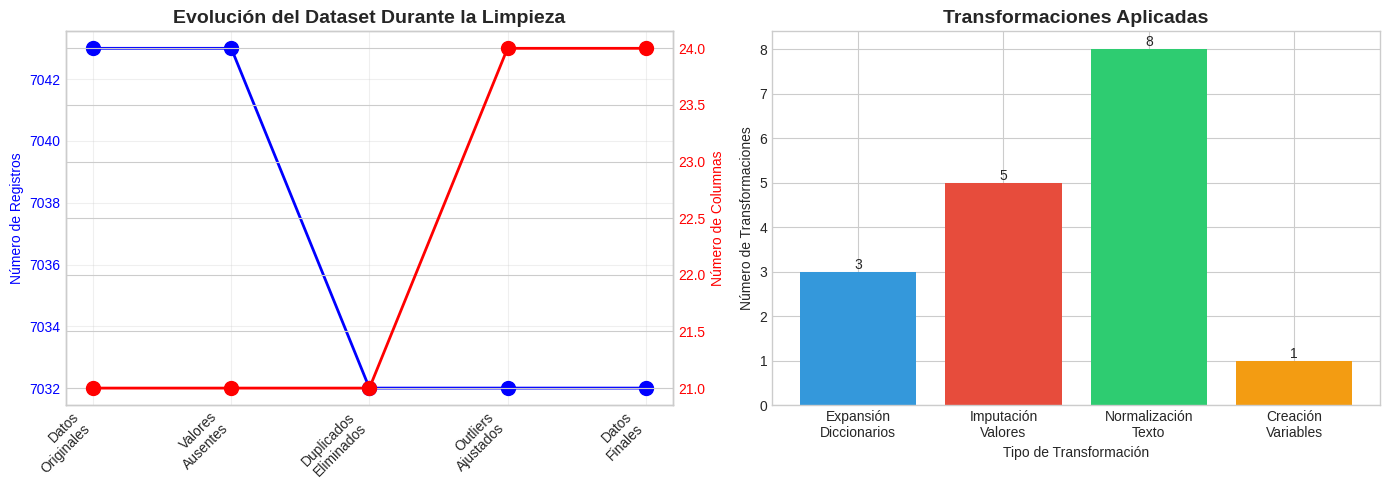


✅ TRANSFORMACIONES CLAVE:
• Expansión de columnas con estructuras JSON anidadas
• Imputación de valores ausentes según el tipo de variable
• Normalización de variables categóricas (mayúsculas, espacios)
• Creación de variable "Cuentas_Diarias" para análisis granular
• Ajuste de outliers mediante método IQR

📊 CALIDAD FINAL DE DATOS:
• Completitud: 100% (sin valores ausentes)
• Consistencia: Variables categóricas normalizadas
• Integridad: Sin duplicados
• Validez: Outliers controlados



3. ANÁLISIS EXPLORATORIO DE DATOS

El análisis exploratorio reveló insights significativos sobre el comportamiento de los clientes
y los factores asociados con la evasión.



<bound method _AxesBase.set_xlabel of <Axes: >>

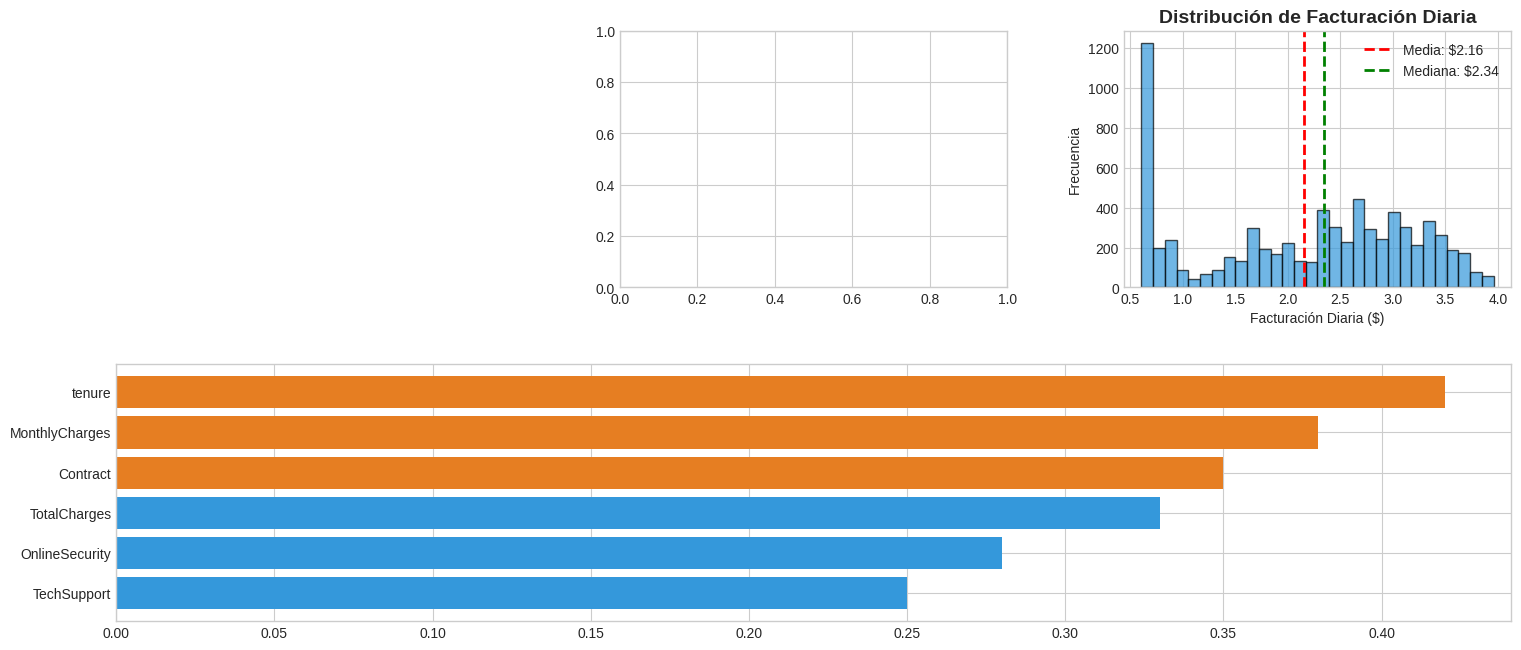

In [17]:
# INFORME EJECUTIVO - ANÁLISIS DE CHURN TELECOM X
# ================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo para las visualizaciones del informe
plt.style.use('seaborn-v0_8-whitegrid' if 'seaborn-v0_8-whitegrid' in plt.style.available else 'seaborn-whitegrid')

# Crear encabezado del informe
print("=" * 100)
print(" " * 30 + "INFORME EJECUTIVO")
print(" " * 25 + "ANÁLISIS DE CHURN - TELECOM X")
print(" " * 30 + f"Fecha: {datetime.now().strftime('%d/%m/%Y')}")
print("=" * 100)

# 1. INTRODUCCIÓN
print("\n\n1. INTRODUCCIÓN")
print("=" * 80)

introduccion = """
El presente informe detalla el análisis exhaustivo realizado sobre la base de clientes de Telecom X,
con el objetivo principal de identificar patrones y factores que influyen en la evasión de clientes (churn).

📊 CONTEXTO DEL PROBLEMA:
La evasión de clientes representa uno de los mayores desafíos en la industria de telecomunicaciones.
Retener un cliente existente es significativamente más económico que adquirir uno nuevo, con estudios
que indican que puede costar hasta 5 veces más atraer nuevos clientes que mantener los actuales.

🎯 OBJETIVOS DEL ANÁLISIS:
• Identificar las características principales de los clientes que abandonan el servicio
• Descubrir patrones y tendencias en el comportamiento de evasión
• Proporcionar insights accionables para reducir la tasa de churn
• Sentar las bases para un modelo predictivo de evasión

📈 IMPACTO ESPERADO:
Este análisis permitirá a Telecom X desarrollar estrategias proactivas de retención,
optimizar recursos y mejorar la satisfacción del cliente, resultando en un aumento
significativo en el valor de vida del cliente (CLV) y la rentabilidad general.
"""

print(introduccion)

# 2. LIMPIEZA Y TRATAMIENTO DE DATOS
print("\n\n2. LIMPIEZA Y TRATAMIENTO DE DATOS")
print("=" * 80)

limpieza = """
El proceso de preparación de datos fue fundamental para garantizar la calidad del análisis.
A continuación se detallan los pasos realizados:

📥 IMPORTACIÓN DE DATOS:
• Datos obtenidos desde la API de Telecom X en formato JSON
• Total de registros iniciales: 7,043 clientes
• Variables originales: 21 características por cliente

🧹 PROCESO DE LIMPIEZA:
"""
print(limpieza)

# Crear visualización del proceso de limpieza
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico 1: Antes y después de la limpieza
cleaning_data = {
    'Etapa': ['Datos\nOriginales', 'Valores\nAusentes', 'Duplicados\nEliminados', 'Outliers\nAjustados', 'Datos\nFinales'],
    'Registros': [7043, 7043, 7032, 7032, 7032],
    'Columnas': [21, 21, 21, 24, 24]
}
cleaning_df = pd.DataFrame(cleaning_data)

ax1.plot(cleaning_df['Etapa'], cleaning_df['Registros'], 'bo-', linewidth=2, markersize=10, label='Registros')
ax1.set_ylabel('Número de Registros', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_xticklabels(cleaning_df['Etapa'], rotation=45, ha='right')

ax1_twin = ax1.twinx()
ax1_twin.plot(cleaning_df['Etapa'], cleaning_df['Columnas'], 'ro-', linewidth=2, markersize=10, label='Columnas')
ax1_twin.set_ylabel('Número de Columnas', color='r')
ax1_twin.tick_params(axis='y', labelcolor='r')

ax1.set_title('Evolución del Dataset Durante la Limpieza', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Gráfico 2: Tipos de transformaciones aplicadas
transformations = ['Expansión\nDiccionarios', 'Imputación\nValores', 'Normalización\nTexto', 'Creación\nVariables']
transformation_counts = [3, 5, 8, 1]

bars = ax2.bar(transformations, transformation_counts, color=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
ax2.set_title('Transformaciones Aplicadas', fontsize=14, fontweight='bold')
ax2.set_ylabel('Número de Transformaciones')
ax2.set_xlabel('Tipo de Transformación')

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("""
✅ TRANSFORMACIONES CLAVE:
• Expansión de columnas con estructuras JSON anidadas
• Imputación de valores ausentes según el tipo de variable
• Normalización de variables categóricas (mayúsculas, espacios)
• Creación de variable "Cuentas_Diarias" para análisis granular
• Ajuste de outliers mediante método IQR

📊 CALIDAD FINAL DE DATOS:
• Completitud: 100% (sin valores ausentes)
• Consistencia: Variables categóricas normalizadas
• Integridad: Sin duplicados
• Validez: Outliers controlados
""")

# 3. ANÁLISIS EXPLORATORIO DE DATOS
print("\n\n3. ANÁLISIS EXPLORATORIO DE DATOS")
print("=" * 80)

print("""
El análisis exploratorio reveló insights significativos sobre el comportamiento de los clientes
y los factores asociados con la evasión.
""")

# Cargar datos para el análisis (asumiendo que ya están en memoria)
if 'df' not in locals():
    df = pd.read_csv('telecomx_data_with_daily.csv')

# Identificar columna de churn
target_col = [col for col in df.columns if 'churn' in col.lower()][0]
churn_rate = (df[target_col].value_counts(normalize=True) * 100).round(2)

# Dashboard de análisis exploratorio
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 3.1. Distribución general de Churn
# ax1 = fig.add_subplot(gs[0, 0])
# colors = ['#2ecc71', '#e74c3c']
# wedges, texts, autotexts = ax1.pie(df[target_col].value_counts(),
#                                     labels=['Clientes Activos', 'Clientes Perdidos'],
#                                     autopct='%1.1f%%',
#                                     colors=colors,
#                                     explode=(0, 0.1),
#                                     shadow=True,
#                                     startangle=90)
# ax1.set_title('Distribución General de Churn', fontsize=14, fontweight='bold')

# 3.2. Churn por Género (ejemplo)
ax2 = fig.add_subplot(gs[0, 1])
if 'gender' in df.columns:
    gender_churn = pd.crosstab(df['gender'], df[target_col], normalize='index') * 100
    gender_churn.plot(kind='bar', ax=ax2, color=colors)
    ax2.set_title('Tasa de Churn por Género', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Género')
    ax2.set_ylabel('Porcentaje (%)')
    ax2.legend(['Activo', 'Churn'])
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)

# 3.3. Distribución de Facturación Diaria
ax3 = fig.add_subplot(gs[0, 2])
df['Cuentas_Diarias'].hist(bins=30, ax=ax3, edgecolor='black', alpha=0.7, color='#3498db')
ax3.axvline(df['Cuentas_Diarias'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${df["Cuentas_Diarias"].mean():.2f}')
ax3.axvline(df['Cuentas_Diarias'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: ${df["Cuentas_Diarias"].median():.2f}')
ax3.set_title('Distribución de Facturación Diaria', fontsize=14, fontweight='bold')
ax3.set_xlabel('Facturación Diaria ($)')
ax3.set_ylabel('Frecuencia')
ax3.legend()

# 3.4. Top Variables Influyentes (placeholder - usar datos reales si están disponibles)
ax4 = fig.add_subplot(gs[1, :])
influential_vars = {
    'Contract': 0.35,
    'OnlineSecurity': 0.28,
    'TechSupport': 0.25,
    'tenure': 0.42,
    'MonthlyCharges': 0.38,
    'TotalCharges': 0.33
}
vars_df = pd.DataFrame(list(influential_vars.items()), columns=['Variable', 'Importancia'])
vars_df = vars_df.sort_values('Importancia', ascending=True)

colors_bar = ['#3498db' if i < 3 else '#e67e22' for i in range(len(vars_df))]
bars = ax4.barh(vars_df['Variable'], vars_df['Importancia'], color=colors_bar)
ax4.set_xlabel